# Trabalho prático I - Aplicação de técnicas de agrupamento

Nesse trabalho aplicaremos técnicas de aprendizado não-supervisionado em dados do [Yelp](https://drive.google.com/file/d/1dYJFszSL_oSoBLRoZGZPBvgywVcvL1M0/view?usp=sharing) (Ver detalhes sobre o Yelp Challenge [aqui](https://www.yelp.com/dataset/challenge)).

O objetivo principal é encontrar distritos culinários na cidade de Las Vegas (Estados Unidos).
No contexto desse trabalho, distritos culinários são caracterizados por um conjunto de restaurantes que simultaneamente estão próximos (geograficamente) e são similares (com respeito à comida que servem).

O trabalho está dividido em duas partes. Em cada uma delas, vocês deverão utilizar uma parte diferente do conjunto de dados. Mais detalhes, nas seções a seguir.

Além disso, vocês deverão utilizar _Python_ e _Jupyter Notebooks_, de forma que todos os resultados estarão em um _notebook_ (este aqui que vocês estão lendo). Vocês estarão livres para escolher as bibliotecas que preferirem.

Sobre o trabalho:

**Grupo:** de até 3 pessoas. Mantenha em mente que 2 pessoas no mesmo grupo neste trabalho não poderão estar no mesmo grupo no trabalho 2. Pode haver repetição com relação aos grupos das listas.

**Data de entrega:** **23 de maio de 2018** (para ambas as partes) até às **18 horas**.

**Forma de entrega:** Vocês deverão enviar esse notebook (com código, resultados e discussões) para o e-mail do professor. É importante ressaltar que seu notebook tem que ser executável, i.e., resultados (gráficos, tabelas e números) devem ser gerados novamente ao executar o código do notebook a partir do conjunto de dados originais. **A Falha desse último ponto implicará em nota zero!**

**Versão do Python:** Python 2 ou Python 3. Apenas indiquem no início do trabalho qual foi escolhida.



## Parte I

No arquivo `yelp_academic_dataset_business.json` estão contidas informações sobre vários estabelecimentos comerciais do conjunto de dados do Yelp, incluindo várias cidades e tipos de estabelecimento que não temos interesse nesse trabalho. Em cada linha do arquivo há uma _string_ contendo um _json_ referente a cada estabelecimento.

Abaixo, uma exemplo de _json_. Veja que:
-  O atributo `city` identifica a cidade
-  O atributo `business_id` é um identificador único no conjunto de dados em todos os arquivos
-  Os atributos `latitude` e `longitude` estão disponíveis
-  O atributo `categories` caracteriza o ramo de atividade. Todos os restaurantes têm a categoria 'Restaurants' nesse atributo. Além disso, o tipo de culinária de cada restaurante é descrito nesse atributo.

In [1]:
import json
line = '{"city": "Las Vegas", "neighborhood": "Southeast", "name": "Flight Deck Bar & Grill", "business_id": "Pd52CjgyEU3Rb8co6QfTPw", "longitude": -115.1708484, "hours": {"Monday": "8:30-22:30", "Tuesday": "8:30-22:30", "Friday": "8:30-22:30", "Wednesday": "8:30-22:30", "Thursday": "8:30-22:30", "Sunday": "8:30-22:30", "Saturday": "8:30-22:30"}, "state": "NV", "postal_code": "89119", "categories": ["Nightlife", "Bars", "Barbeque", "Sports Bars", "American (New)", "Restaurants"], "stars": 4.0, "address": "6730 S Las Vegas Blvd", "latitude": 36.0669136, "review_count": 13, "attributes": {"Alcohol": "full_bar", "HasTV": true, "NoiseLevel": "average", "RestaurantsAttire": "casual", "BusinessAcceptsCreditCards": true, "Music": {"dj": false, "background_music": true, "no_music": false, "jukebox": false, "live": false, "video": false, "karaoke": false}, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": true}, "RestaurantsGoodForGroups": true, "Caters": true, "WiFi": "free", "RestaurantsReservations": false, "BikeParking": true, "RestaurantsTakeOut": true, "GoodForKids": true, "HappyHour": true, "GoodForDancing": false, "RestaurantsTableService": true, "OutdoorSeating": false, "RestaurantsPriceRange2": 2, "RestaurantsDelivery": false, "BestNights": {"monday": false, "tuesday": false, "friday": false, "wednesday": true, "thursday": false, "sunday": false, "saturday": false}, "GoodForMeal": {"dessert": false, "latenight": false, "lunch": true, "dinner": false, "brunch": false, "breakfast": false}, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "CoatCheck": false, "Smoking": "no", "WheelchairAccessible": true}, "is_open": 1}'
print(json.dumps(json.loads(line), indent = 3))

{
   "city": "Las Vegas", 
   "neighborhood": "Southeast", 
   "name": "Flight Deck Bar & Grill", 
   "business_id": "Pd52CjgyEU3Rb8co6QfTPw", 
   "longitude": -115.1708484, 
   "hours": {
      "Monday": "8:30-22:30", 
      "Tuesday": "8:30-22:30", 
      "Friday": "8:30-22:30", 
      "Wednesday": "8:30-22:30", 
      "Thursday": "8:30-22:30", 
      "Sunday": "8:30-22:30", 
      "Saturday": "8:30-22:30"
   }, 
   "is_open": 1, 
   "state": "NV", 
   "postal_code": "89119", 
   "stars": 4.0, 
   "address": "6730 S Las Vegas Blvd", 
   "latitude": 36.0669136, 
   "review_count": 13, 
   "attributes": {
      "Alcohol": "full_bar", 
      "HasTV": true, 
      "NoiseLevel": "average", 
      "RestaurantsAttire": "casual", 
      "BusinessAcceptsCreditCards": true, 
      "Music": {
         "dj": false, 
         "background_music": true, 
         "no_music": false, 
         "karaoke": false, 
         "live": false, 
         "video": false, 
         "jukebox": false
      }, 
  

A partir dos dados descritos, você deve encontrar distritos culinários em Las Vegas. Encontre grupos considerando que a similaridade entre restaurantes pode ser inferida pelo atributo `categories` e a proximidade através dos atributos `latitude` e `longitude`.

**a)** Proponha uma representação apropriada para os dados. Justifique sua escolha

**b)** Utilize técnicas de agrupamento para encontrar distritos culinários. É obrigatório o uso de pelo menos quatro técnicas:
-  k-means
-  Agrupamento hierárquico
-  GMM (Gaussian Mixture Model)
-  Agrupamento Espectral

**Sugestão:** Todas já estão implementadas na biblioteca _sklearn_

**c)** Apresente uma justificativa plausível para o número de grupos utilzado no item anterior

**d)** Apresente o `dendrograma` para o resultado do agrupamento hierárquico

**e)** Baseado no conteúdo de cada grupo, proponha uma forma sistemática de encontrar _rótulos_ para cada grupo. Veja que se dois grupos forem identificado pelo mesmo rótulo há um problema (com o resultado de seu agrupamento ou com sua forma de rotular grupos)

**f)** Faça um gráfico para cada agrupamento obtido da seguinte forma:
-  cada restaurante será um ponto no plano de acordo com suas coordenadas geográficas
-  a cor de cada ponto será diferente para grupos diferentes
-  cada grupo deve ser identificado com seu respectivo rótulo encontrado no item anterior (e.g., através de uma legenda de cor)

**g)** Comente os resultados. Comente também as diferenças de cada agrupamento

**Observação:** sua criatividade para gerar visualizações informativas e de qualidade será parte da avaliação.


## Resolução da parte I

### Inclusões de biblioteca

In [1]:
%matplotlib inline
import json
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Leitura e representação dos dados

A leitura dos dados foi feita da maneira em que, na opinião dos autores, daria mais legibilidade ao código.  
  
Os dados estão sendo representados por uma matriz onde:
* **Colunas**: Todas as categorias existentes (exceto "Restaurants"), onde cada categoria é um atributo binário, onde 1 indica que o restaurante pertence à categoria e 0 caso contrário, e dois valores ponto flutuante, que são a latitude e longitude
* **Linhas**: Cada restaurante de Las Vegas existente na base de dados
  
Foi utilizado o DataFrame do pandas, e os dados foram exportados para o arquivo "/data/data_pt1.csv", o qual será utilizado para os outros itens da primeira parte.

In [6]:
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r")

data = []
attributes = ['latitude', 'longitude']
data_dict = {}

for line in input_file:
    restaurant = json.loads(line)
    if "Restaurants" in restaurant["categories"] and restaurant["city"] == "Las Vegas":
        data.append(restaurant)
        
input_file.close()

count_categories = {}

for restaurant in data:
    for category in restaurant["categories"]:
        if not(category in attributes) and category != "Restaurants":
            attributes.append(category)
            count_categories[category] = 1
        elif category != "Restaurants":
            count_categories[category] += 1

for attr in attributes:
    data_dict[attr] = []
    for restaurant in data:
        if attr == "latitude" or attr == "longitude":
            data_dict[attr].append(restaurant[attr])
        elif attr != "Restaurants" and attr in restaurant["categories"]:
            data_dict[attr].append(1)
        else:
            data_dict[attr].append(0)
            
df = pd.DataFrame(data_dict)
df.to_csv("data/data_pt1.csv", index=False)

In [102]:
data = pd.read_csv("data/data_pt1.csv")
data.info(verbose=False, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 163 entries, Active Life to longitude
dtypes: float64(2), int64(161)

### PCA (Principal Components Analysis)

Na base de dados, existem 163 atributos. Para não ocorrer a maldição da dimensionalidade, optamos por utilizar PCA para reduzir o número de dimensões. No PCA, não foram utilizadas a latitude e longitude. Essa decisão foi tomada com o intuito de preservar a posição geógráfica, diminuindo apenas o número de categorias.

Text(0,0.5,'Variância acumulada')

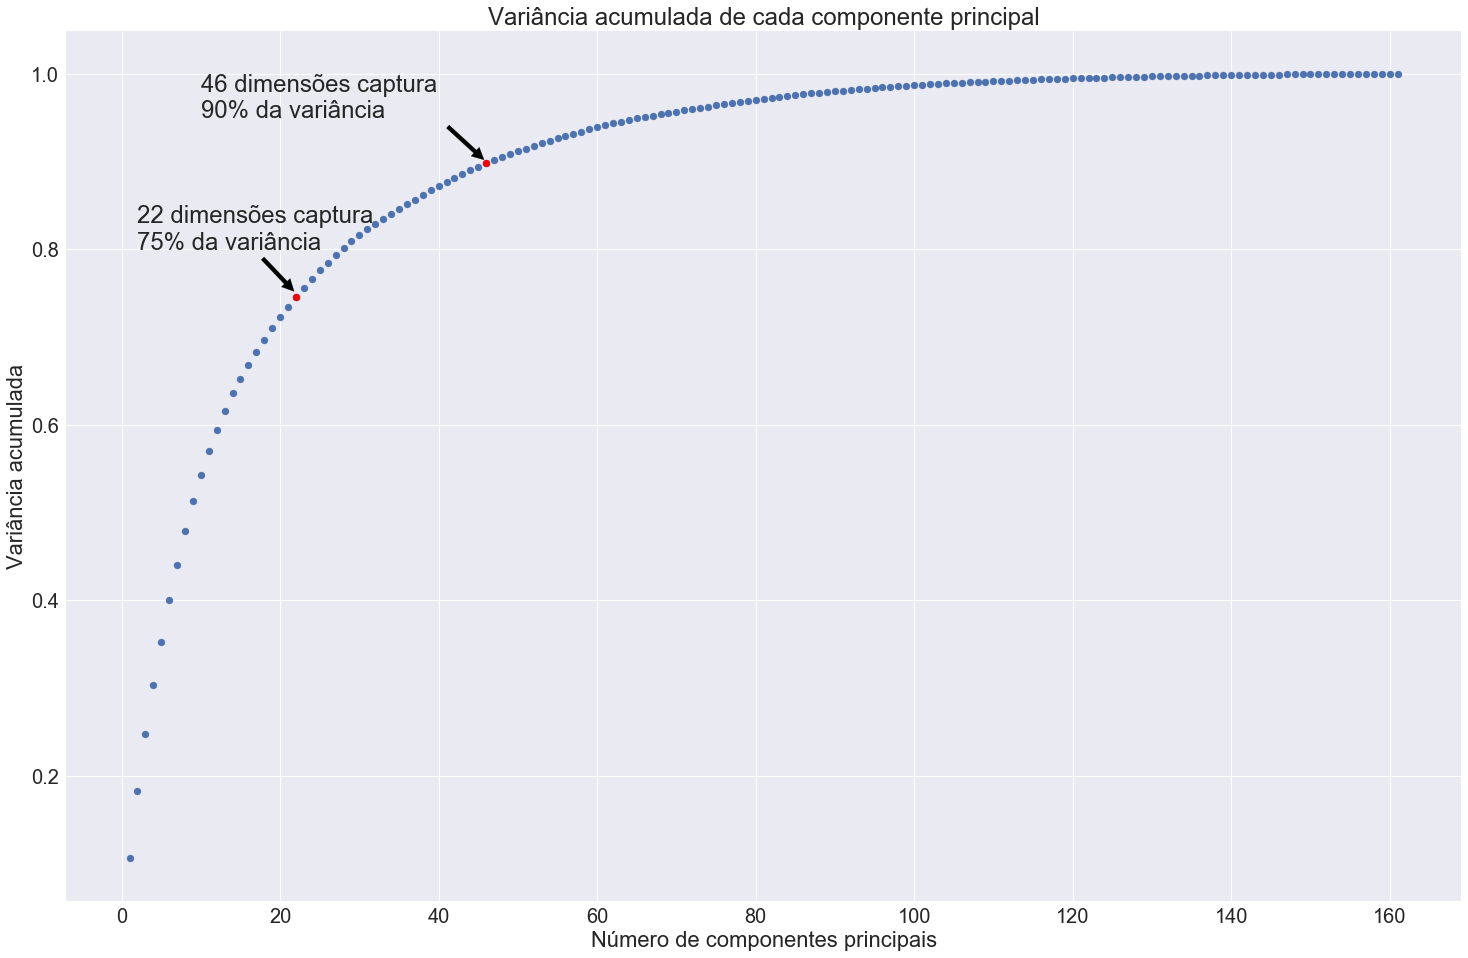

In [103]:
data_analysis = data.drop(["latitude", "longitude"], axis=1)

centralized_data = data_analysis - data_analysis.mean()
pca = PCA(n_components=len(centralized_data.columns))
data_pca = pca.fit_transform(centralized_data)

df_pca = pd.DataFrame(data_pca)

variance = pca.explained_variance_ratio_
for i, j in enumerate(variance):
    variance[i] = sum(variance[i - 1:i + 1]) if i > 0 else variance[i]
    
plt.rcParams["figure.figsize"] = (25, 16)
plt.rcParams['font.size'] = 24.0

sns.set(font_scale=2)
plt.scatter(range(1, len(variance)+1), variance)
plt.scatter([22, 46], [variance[21], variance[45]], color="red")
plt.annotate("22 dimensões captura \n75% da variância", xy=(22, 0.75), xytext=(2, 0.8), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("46 dimensões captura \n90% da variância", xy=(46, 0.9), xytext=(10, 0.95), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Variância acumulada de cada componente principal")
plt.xlabel("Número de componentes principais")
plt.ylabel("Variância acumulada")

Foram feitos testes clusterizando com $75\%$ da variância e $90\%$ da variância. Os resultados foram melhores com a variância menor, o que impressionou os autores. Então, será utilizada para a clusterização uma matriz da forma:
* **Colunas**: As 22 primeiras componentes principais, latitude e longitude
* **Linhas**: Cada restaurante de Las Vegas existente na base de dados

In [104]:
#Removendo as dimensões
df_pca = df_pca.drop(
        [column for column in range(22, len(df_pca.columns))], axis=1)

data_analysis = df_pca

#Inserindo latitude e longitude
data_analysis.insert(len(data_analysis.columns),
                     "latitude", data["latitude"])
data_analysis.insert(len(data_analysis.columns),
                     "longitude", data["longitude"])

### Normalização dos dados

Dados com ordem de grandeza diferentes podem influênciar o resultado da clusterização, com a possibilidade de viés para atributos com ordem de grandeza maior. Então, os dados foram normalizados utilizando normalização min-max, dada por:


$$X_{std}(attr) = \frac{X(attr) - min(X(attr))} {max(X(attr)) - min(X(attr))},$$ 

sendo $attr$ cada atributo da matriz de dados $X$. A nova matriz de dados $X_{new}$ é dada por:

$$X_{new} = [X_{std}(attr_1), ..., X_{std}(attr_n)]$$

In [105]:
for column in data_analysis:
    data_analysis[column] = (data_analysis[column] - data_analysis[column].min()) / \
        (data_analysis[column].max() - data_analysis[column].min())

### Definição de pesos para latitude e longitude
  
Clusterizando do jeito que estão os dados, os dados foram separados muito bem por categoria, mas com uma separação muito ruim pelo espaço. Como o objetivo é encontrar distritos culinários, não faz sentido esses distritos serem formados por restaurantes que se encontram muito longe. Com isso, foram propostas duas abordagens. São elas:  
* Clusterizar por posição geográfica, e para cada grupo, tentar separá-los por categoria
* Dar um peso $\alpha$ para latitude e longitude, para os algoritmos considerem mais esses atributos  

A primeira alternativa pode dar errado se dois grupos forem separados por posição e na separação por categorias, gerar dois grupos redundantes com certa proximidade. Com isso, teria que ser utilizada uma técnica mais elaborada para juntar esses grupos, como o DBSCAN. Afim de facilitar essa parte, foi escolhida a segunda alternativa. Os valores de peso foram escolhidos empiricamente em cada algoritmo. Valores de peso muito alto deixaram grupos com categorias redundantes, e valores de peso muito baixo deixavam grupos muito espaçados geograficamente.

### Definição de funções

Aqui foram definidas funções que serão utilizadas a seguir.

- silhouette_analysis: Essa função faz a análise de silhueta dos dados. Foi baseada no [exemplo da sklearn].

- create_cluster_labels: Cria as categorias para cada grupo.

- clusterization_plot: Faz o plot da latitude e longitude utilizando as categorias criadas pela função create_cluster_labels.

[exemplo da sklearn]: <http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py>

In [106]:
def silhouette_analysis(data_analysis, n_clusters, method="k-means"):
    if method == "k-means":
        clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "agrupamento hiérarquico":
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "GMM":
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type='spherical').fit(data_analysis)
        cluster_labels = clusterer.predict(data_analysis)
    else:
        clusterer = SpectralClustering(n_clusters=n_clusters, n_jobs=-1, eigen_solver='arpack')
        cluster_labels = clusterer.fit_predict(data_analysis)

    sns.set()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_analysis) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(data_analysis, cluster_labels)
    print("Para n_clusters = ", n_clusters,
          ", o silhouette_score médio é:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(
        data_analysis, cluster_labels)

    y_lower = 10

    colors_vec = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#fabebe", "#008080",
                  "#e6beff", "#800000", "#000080", "#000000", "#d2f53c", "#808080"]

    color = sns.color_palette(colors_vec)
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("A distribuição do coeficiente de silhueta por cluster.")
    ax1.set_xlabel("Valor do coeficiente de silhueta")
    ax1.set_ylabel("Rótulos do cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = [color[i] for i in cluster_labels]
    ax2.scatter(data["latitude"].as_matrix(), data["longitude"].as_matrix(),
                marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("A visualização dos dados clusterizados")
    ax2.set_xlabel("Latitude")
    ax2.set_ylabel("Longitude")

    plt.suptitle(("Análise da silhueta utilizando o " + method + " com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [107]:
def create_cluster_labels(data_analysis, n_clusters, method="k-means", top_n = 3):
    if method == "k-means":
        clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "agrupamento hiérarquico":
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "GMM":
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type='spherical').fit(data_analysis)
        cluster_labels = clusterer.predict(data_analysis)
    else:
        clusterer = SpectralClustering(n_clusters=n_clusters, n_jobs=-1, eigen_solver='arpack')
        cluster_labels = clusterer.fit_predict(data_analysis)
        
    data_with_labels = data.copy()
    data_with_labels.insert(len(data_with_labels.columns), "label", cluster_labels)

    for n_categories in range(3, top_n + 1):
        all_categories = []
        for i in range(n_clusters):
            data_label = data_with_labels[data_with_labels.label == i]
            data_cluster = data_label.drop(
                ["latitude", "longitude", "label"], axis=1)
            all_categories.append(
                data_cluster.sum().sort_values(ascending=False)[:n_categories])
        print("\n====== ", n_categories, "======")
        val_categories = False
        for i in range(len(all_categories)):
            for j in range(i + 1, len(all_categories)):
                cont = 0
                for k in all_categories[i].index:
                    if k in all_categories[j].index:
                        cont += 1
                if cont == len(all_categories[i].index):
                    val_categories = True
                    print("\nCategorias repetidas para n_clusters = ", n_clusters)
                    print("Cluster ", i, " e Cluster ", j)
                    for category in all_categories[i].index:
                        print(category, end=" ")
                    print()
                    for category in all_categories[j].index:
                        print(category, end=" ")
                    print("\n")
                    
        if not val_categories:
            print("Sem categoria repetida.")
            
            for i, category in enumerate(all_categories):
                all_categories[i] = tuple(category.index)
            return all_categories, data_with_labels

In [155]:
def clusterization_plot(labels, data_labels, method):
    colors_vec = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#fabebe", "#008080",
                  "#e6beff", "#800000", "#000080", "#000000", "#d2f53c", "#808080"]

    color = sns.color_palette(colors_vec)

    for index, value in enumerate(labels):
        new_label = ""
        for i, category in enumerate(value):
            new_label += category if i == len(value) - 1 else category + ", "
        labels[index] = new_label
        
    #plt.rcParams["figure.figsize"] = (40, 35)
    #plt.rcParams['font.size'] = 30.0
    
    plt.rcParams["figure.figsize"] = (25, 16)
    plt.rcParams['font.size'] = 26.0
    
    plots = []
    for cluster in range(0, data_labels["label"].max() + 1):
        data_cluster = data_labels[data_labels.label == cluster]
        plot = plt.scatter(data_cluster["latitude"].as_matrix(), data_cluster["longitude"].as_matrix(),
                    marker='o', s=100, lw=0, alpha=0.7, c=color[cluster], edgecolor='k')
        plots.append(plot)
        
    plt.legend(plots, labels)
    plt.title("Distritos culinários encontrados pelo " + method + " com n_cluster = " + str(len(labels)))
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

### K-means

Para o k-means, foi escolhido um peso $\alpha$ de $2.3$ para a latitude e longitude empiricamente. Esse valor foi variado no intervalo $[2.0, 3.0]$, com um incremento de $0.1$, sendo esse o melhor resultado na opinião dos autores. Os parâmetros utilizados foram os *defaut* da biblioteca. Como foi dito acima, os valores altos não separam muito bem as categorias, e os valores baixos não separam muito bem por posição. 

In [109]:
data_kmeans = data_analysis.copy()
data_kmeans["latitude"] *= 2.3
data_kmeans["longitude"] *= 2.3

Para o k-means, foi análisado o gráfico da inércia pelo número de grupos. Note que a mudança de comportamento foi aproximadamente com o $k = 15$. Então, foi decidido pelos autores utilizar valores de $k$ variando de $10$ à $15$. Isso corrobora o número de grupos que o professor Giovanni sugeriu.

1729.2364392854438


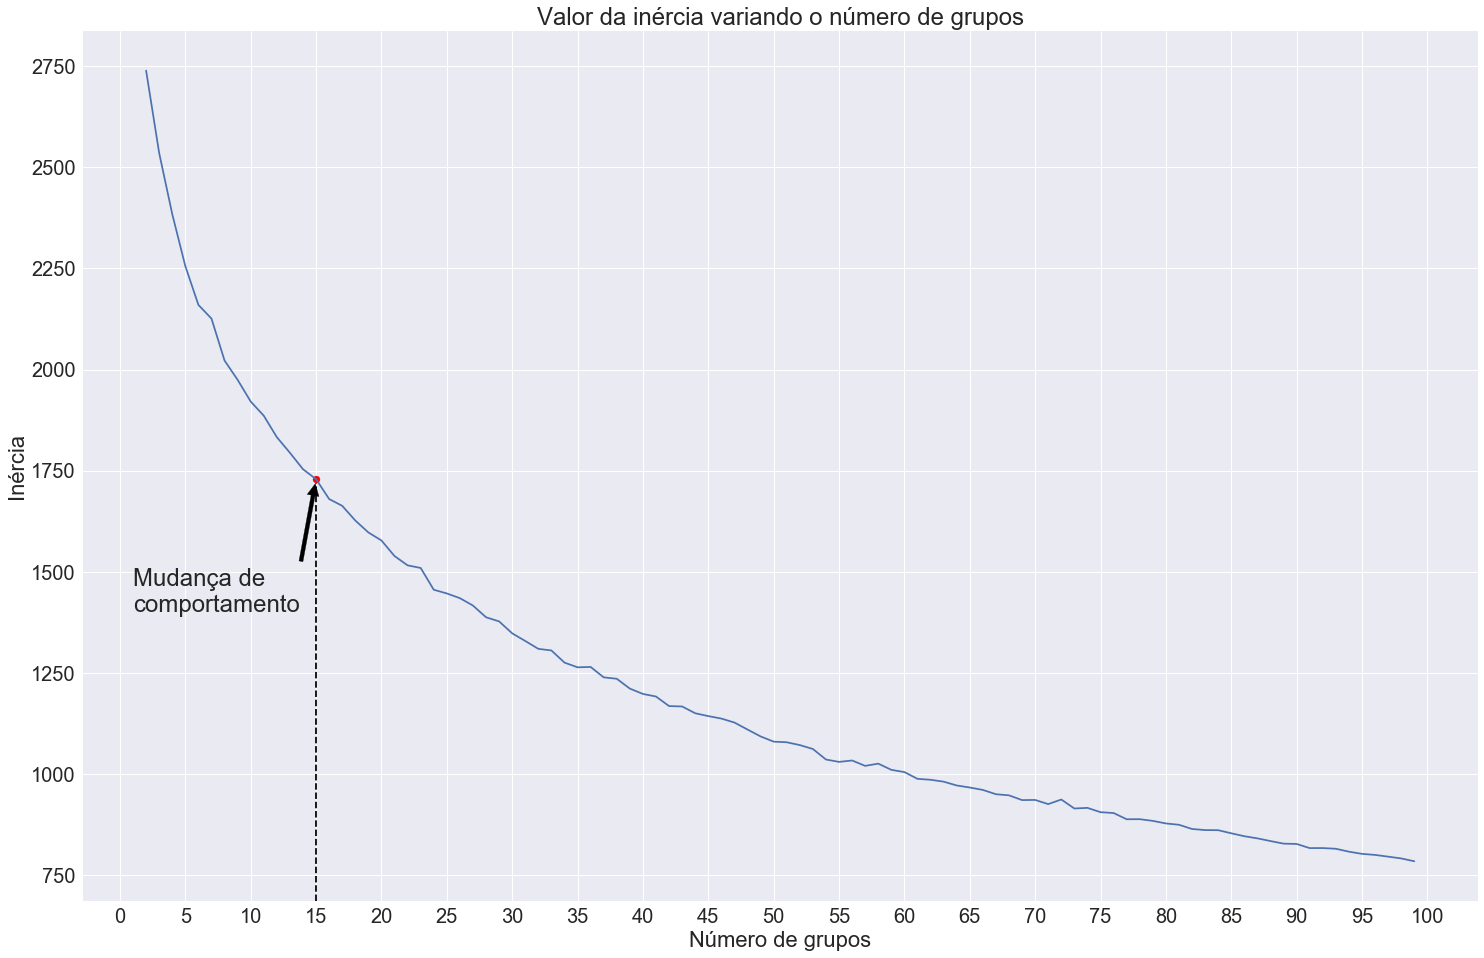

In [56]:
inertia = []
for k in range(2, 100):
    km = KMeans(n_clusters=k, n_jobs=-1)
    labels = km.fit_predict(data_kmeans)
    inertia.append(km.inertia_)
sns.set(font_scale=2)
plt.plot(range(2, 100), inertia)
plt.scatter([15], [inertia[13]], color="red")
plt.axvline(x=15, ymax=0.48, color="black", linestyle="--")
plt.annotate("Mudança de \ncomportamento", xy=(15, 1729), xytext=(1, 1400), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xticks([i for i in range(0, 101, 5)])
plt.title("Valor da inércia variando o número de grupos")
plt.xlabel("Número de grupos")
plt.ylabel("Inércia")
plt.show()

Para n_clusters =  10 , o silhouette_score médio é: 0.13647358734275156


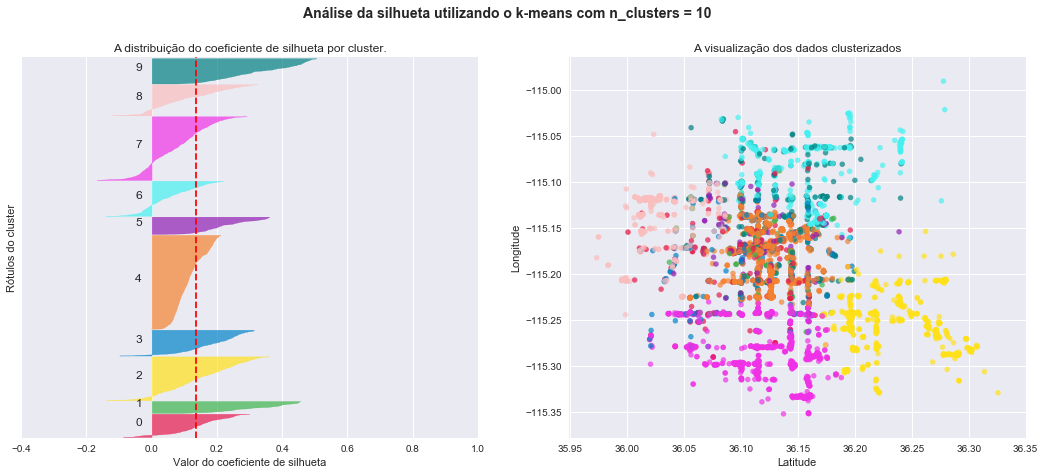

In [18]:
silhouette_analysis(data_kmeans, 10)

Para n_clusters =  11 , o silhouette_score médio é: 0.1196141620027791


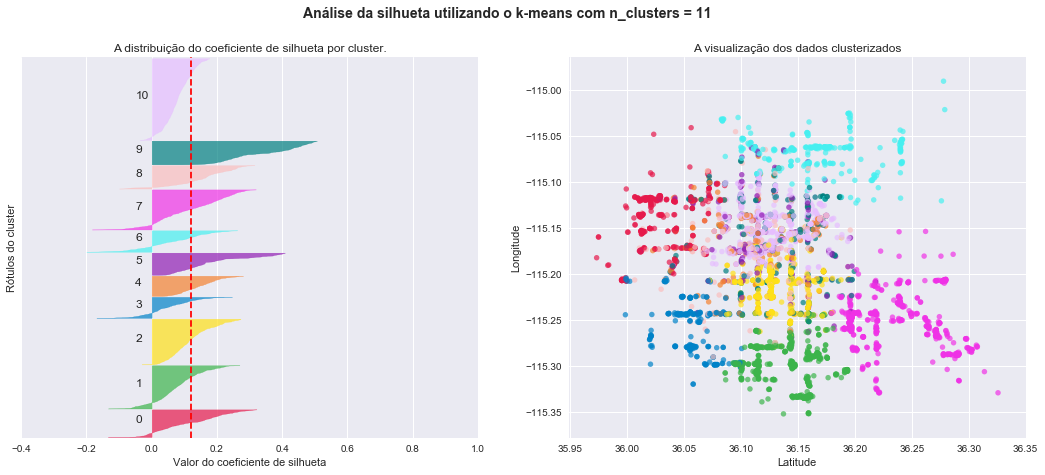

In [19]:
silhouette_analysis(data_kmeans, 11)

Para n_clusters =  12 , o silhouette_score médio é: 0.13733730369835953


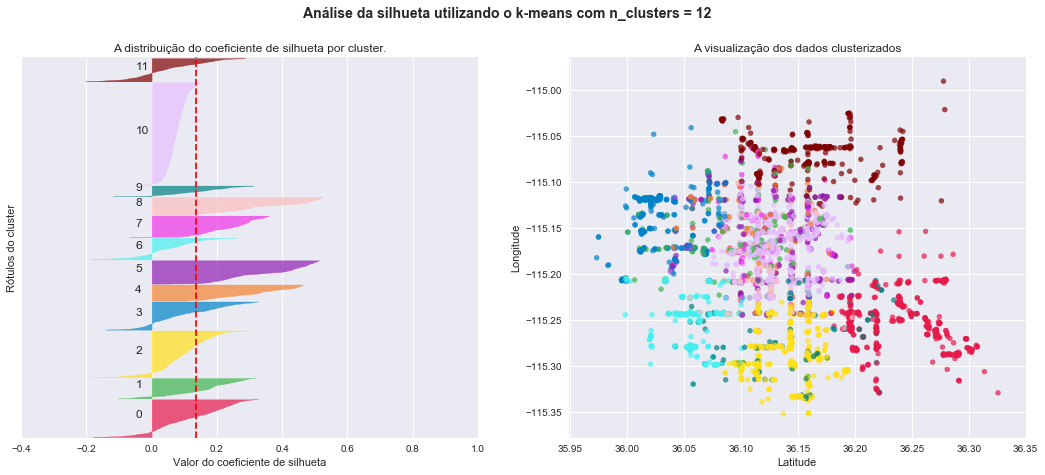

In [20]:
silhouette_analysis(data_kmeans, 12)

Para n_clusters =  13 , o silhouette_score médio é: 0.14733934749048969


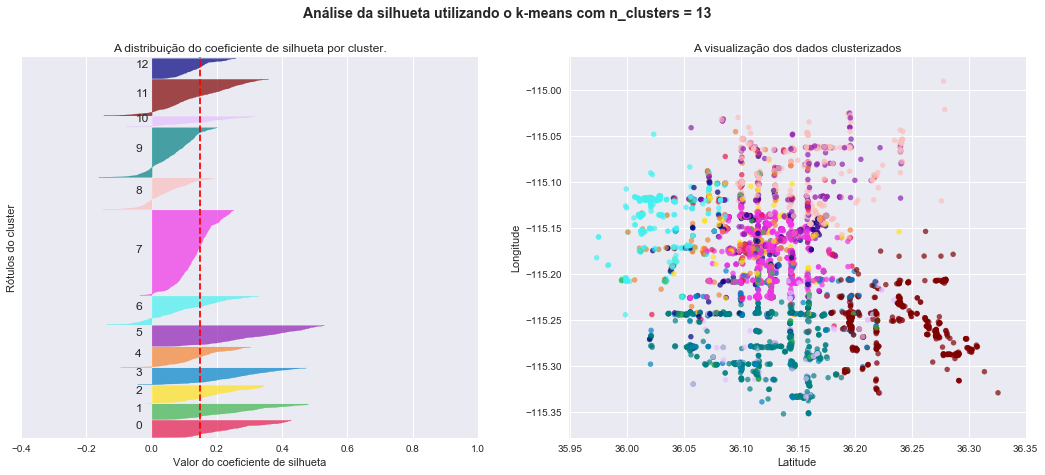

In [21]:
silhouette_analysis(data_kmeans, 13)

Para n_clusters =  14 , o silhouette_score médio é: 0.1406205620220735


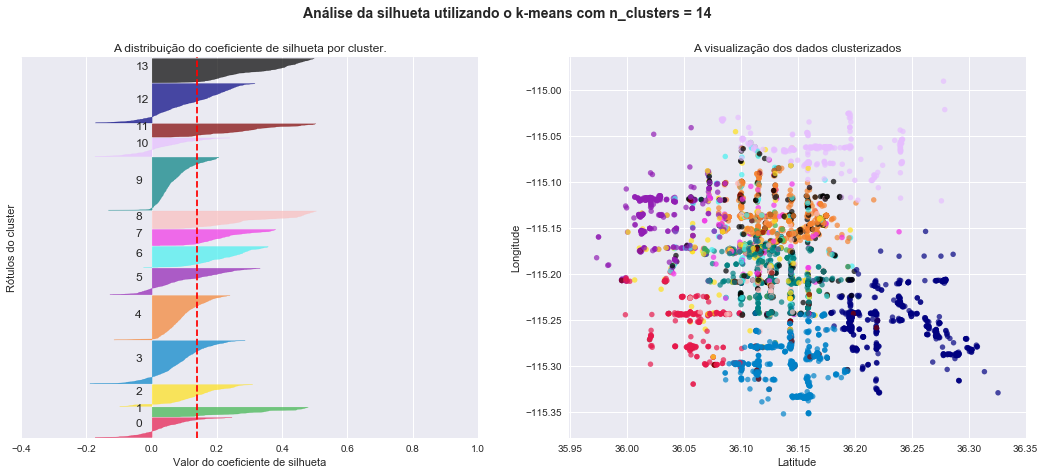

In [22]:
silhouette_analysis(data_kmeans, 14)

Para n_clusters =  15 , o silhouette_score médio é: 0.15511410003619328


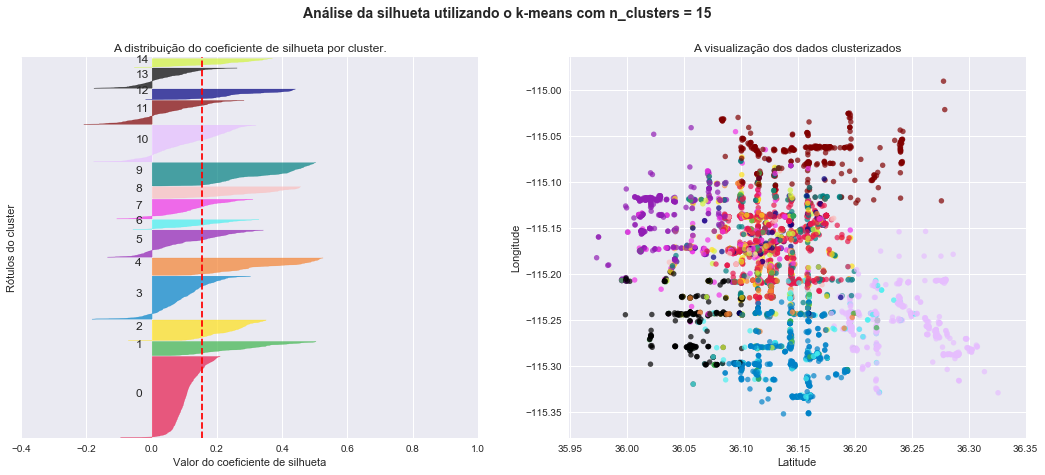

In [23]:
silhouette_analysis(data_kmeans, 15)

Para o k-means, o número de grupos escolhido pelos autores foi 15.

### Agrupamento hierárquico

Para o agrupamento hierárquico, foi escolhido um peso $\alpha$ de $5.0$ para a latitude e longitude empiricamente. Esse valor foi variado no intervalo $[2.0, 5.0]$, com um incremento de $0.5$, sendo esse o melhor resultado na opinião dos autores. Os parâmetros utilizados foram os *defaut* da biblioteca.

In [110]:
data_hier = data_analysis.copy()
data_hier["latitude"] *= 3
data_hier["longitude"] *= 3

Para n_clusters =  10 , o silhouette_score médio é: 0.09111649755717892


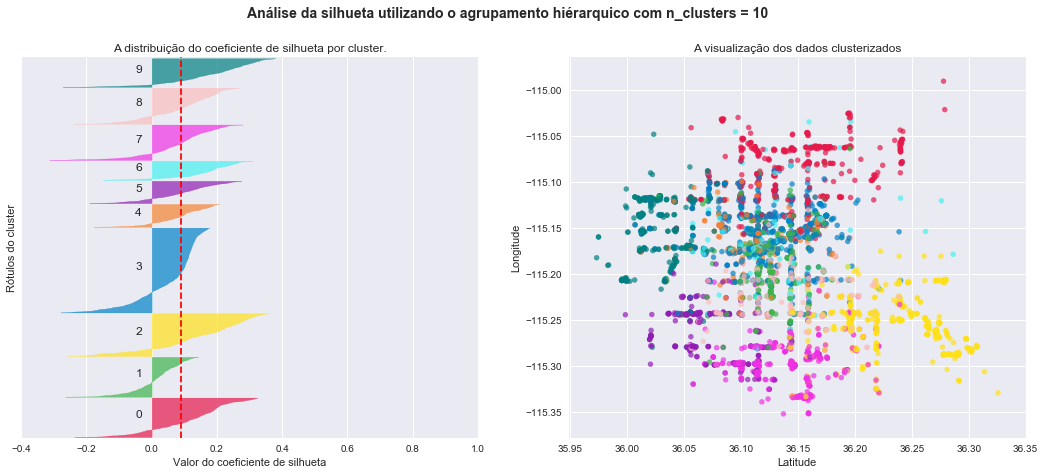

In [46]:
silhouette_analysis(data_hier, 10, "agrupamento hiérarquico")

Para n_clusters =  11 , o silhouette_score médio é: 0.08027392538447713


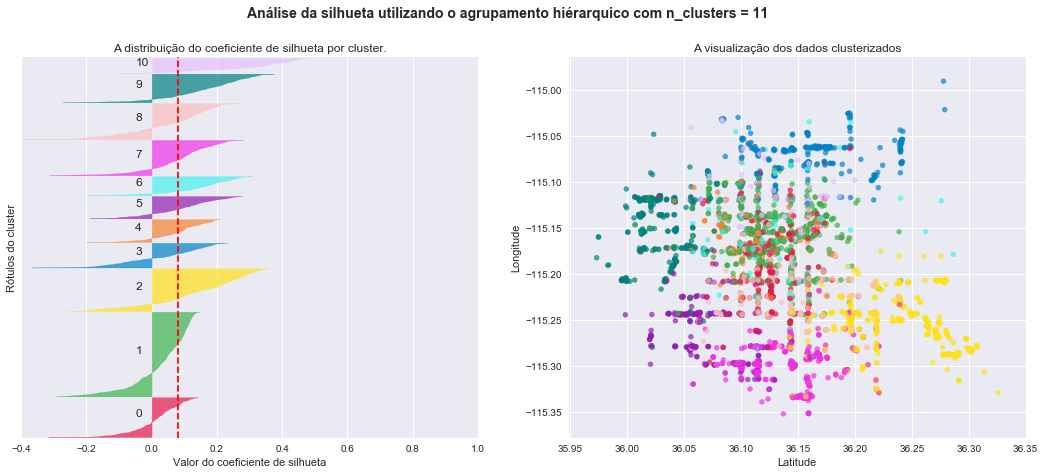

In [47]:
silhouette_analysis(data_hier, 11, "agrupamento hiérarquico")

Para n_clusters =  12 , o silhouette_score médio é: 0.08745541570854483


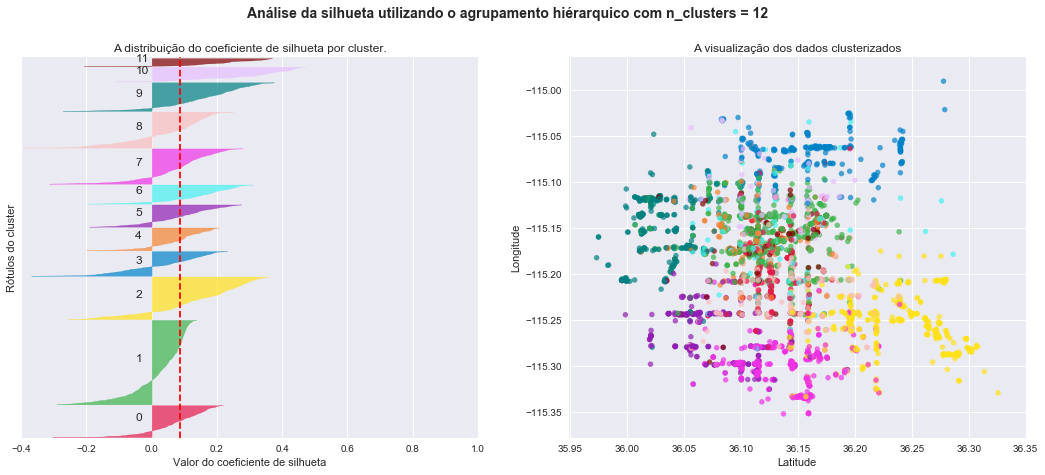

In [48]:
silhouette_analysis(data_hier, 12, "agrupamento hiérarquico")

Para n_clusters =  13 , o silhouette_score médio é: 0.09233512172162509


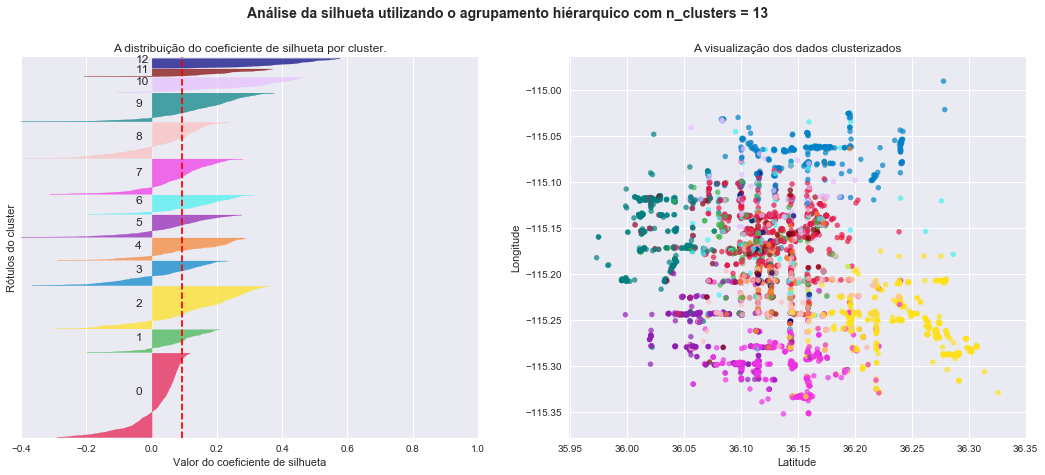

In [49]:
silhouette_analysis(data_hier, 13, "agrupamento hiérarquico")

Para n_clusters =  14 , o silhouette_score médio é: 0.09853368092850961


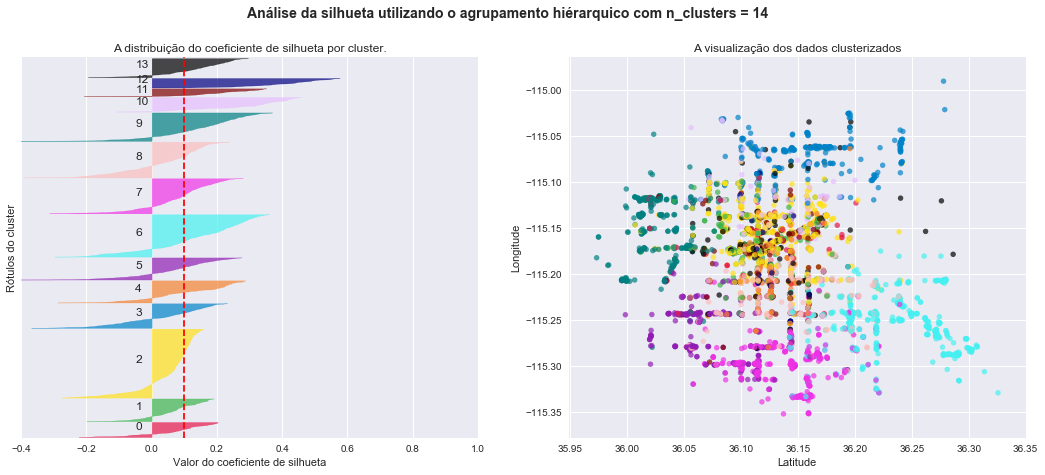

In [50]:
silhouette_analysis(data_hier, 14, "agrupamento hiérarquico")

Para n_clusters =  15 , o silhouette_score médio é: 0.1060659966206053


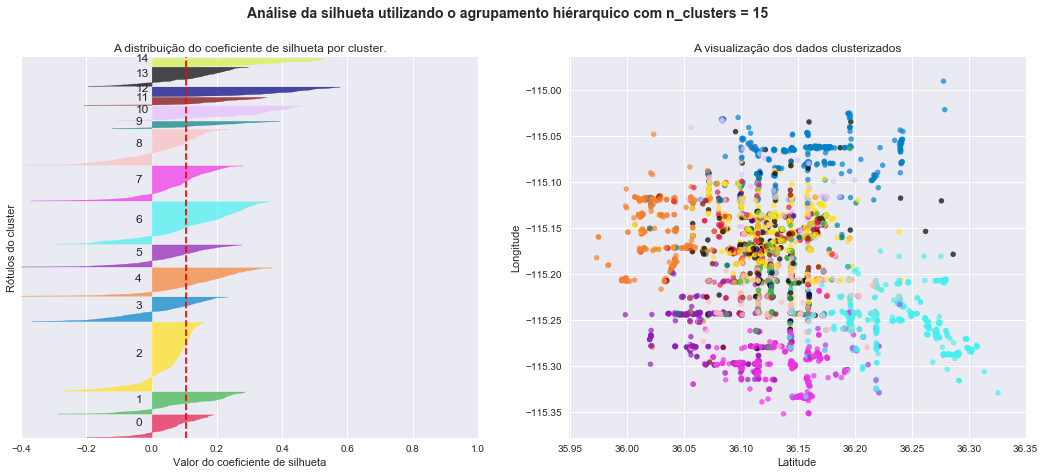

In [51]:
silhouette_analysis(data_hier, 15, "agrupamento hiérarquico")

Para o agrupamento hierárquico, o número de grupos escolhidos foi 15.

### GMM (Gaussian Mixture Model)

Para o GMM, o peso $\alpha$ foi variado no intervalo $[0.5, 10.0]$, com um incremento de $0.5$. Também foram variados os seguintes parâmetros do GMM da sklearn:
* covariance_type: 
    - 'full' (cada componente tem sua própria matriz de covariância geral),
    - 'tied' (todos os componentes compartilham a mesma matriz de covariância geral),
    - 'diag' (cada componente tem sua própria matriz de covariância diagonal),
    - 'spherical' (cada componente tem sua própria variância única)
* tol:
    - Variada de $[10^{-3}, 10^{-6}]$ com incremento de $10^{-1}$.
* max_iter:
    - Variada de $[100, 1000]$ com incremento de $100$.
    
O melhor resultado segundo a opinião dos autores foi $\alpha = 2.5$, com o parâmetro *covariance_type* = 'spherical'. O coeficiente de silhueta do GMM ficou o pior dentre todos os algoritmos. Mas como discutido com o professor Giovanni, como os grupos são não convexos, o coeficiente de silhueta não é uma medida tão interessante para avaliar a qualidade da clusterização.

In [111]:
data_gmm = data_analysis.copy()
data_gmm["latitude"] *= 2.3
data_gmm["longitude"] *= 2.3

Para n_clusters =  10 , o silhouette_score médio é: 0.02399462240829752


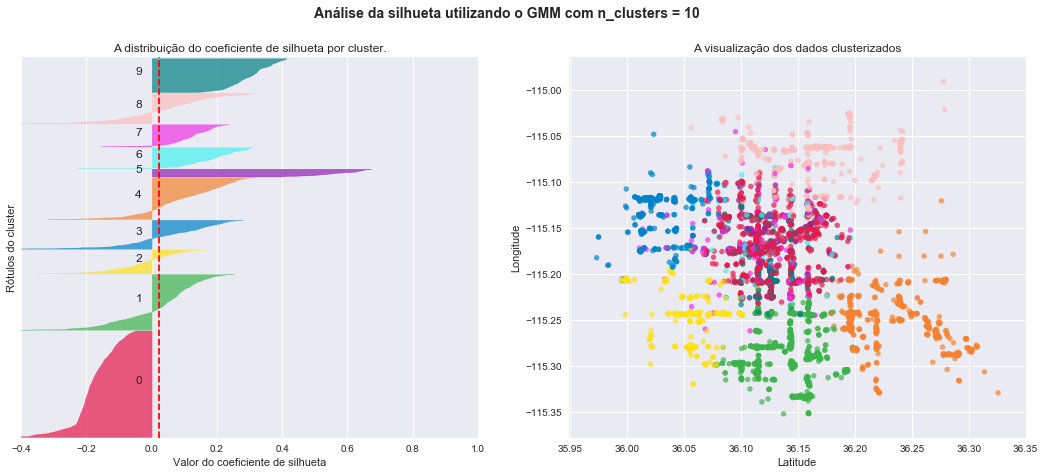

In [112]:
silhouette_analysis(data_gmm, 10, "GMM")

Para n_clusters =  11 , o silhouette_score médio é: 0.017486607223218122


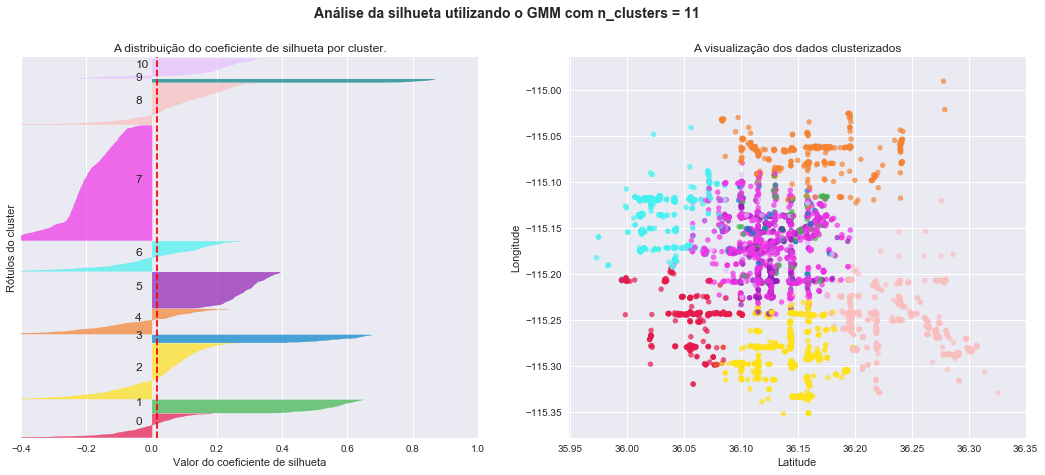

In [113]:
silhouette_analysis(data_gmm, 11, "GMM")

Para n_clusters =  12 , o silhouette_score médio é: -0.012464658718880384


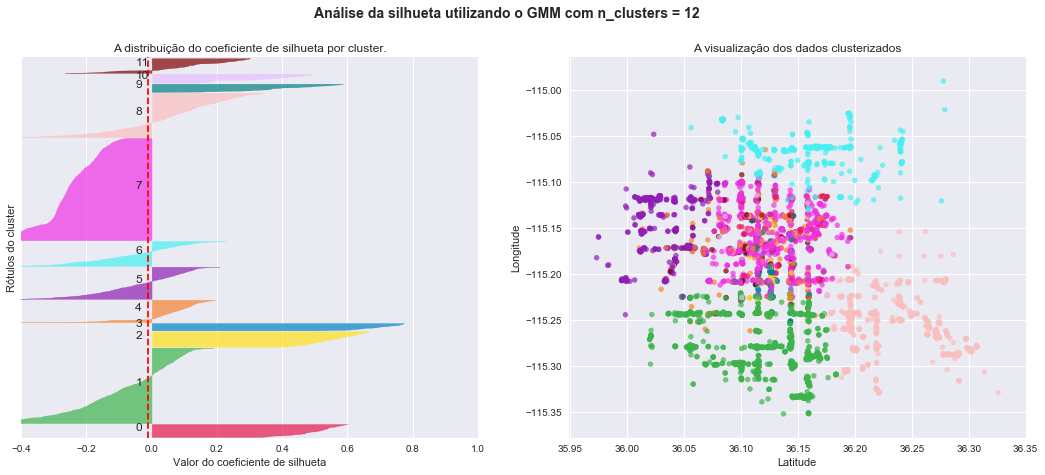

In [114]:
silhouette_analysis(data_gmm, 12, "GMM")

Para n_clusters =  13 , o silhouette_score médio é: 0.0491745945767993


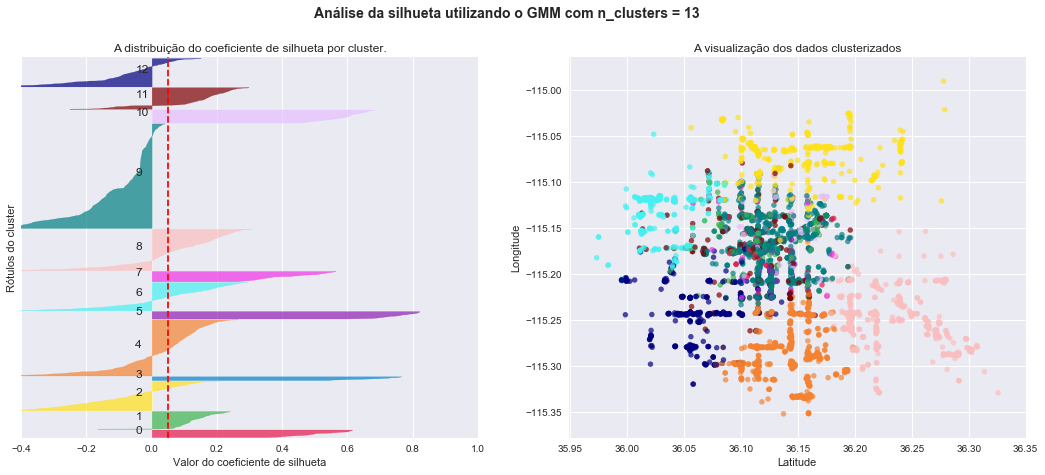

In [115]:
silhouette_analysis(data_gmm, 13, "GMM")

Para n_clusters =  14 , o silhouette_score médio é: -0.000808529821899862


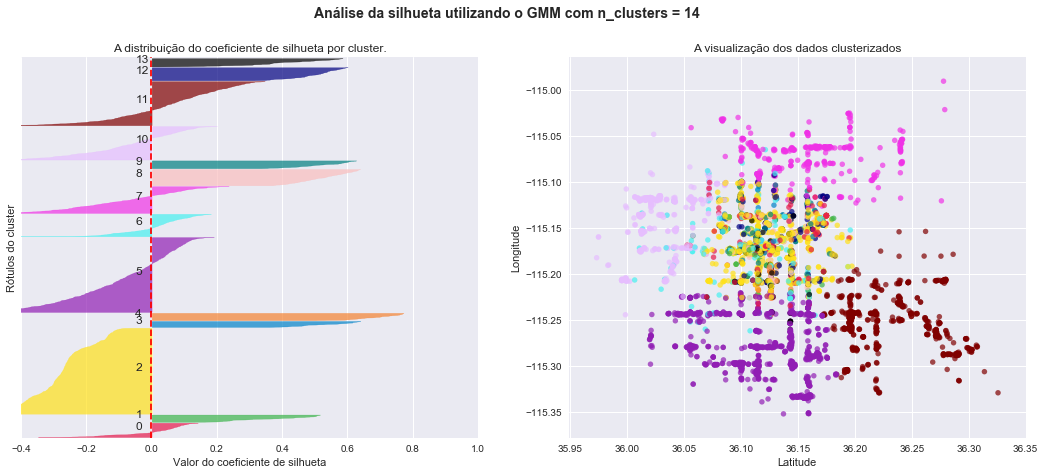

In [116]:
silhouette_analysis(data_gmm, 14, "GMM")

Para n_clusters =  15 , o silhouette_score médio é: 0.0448771035634659


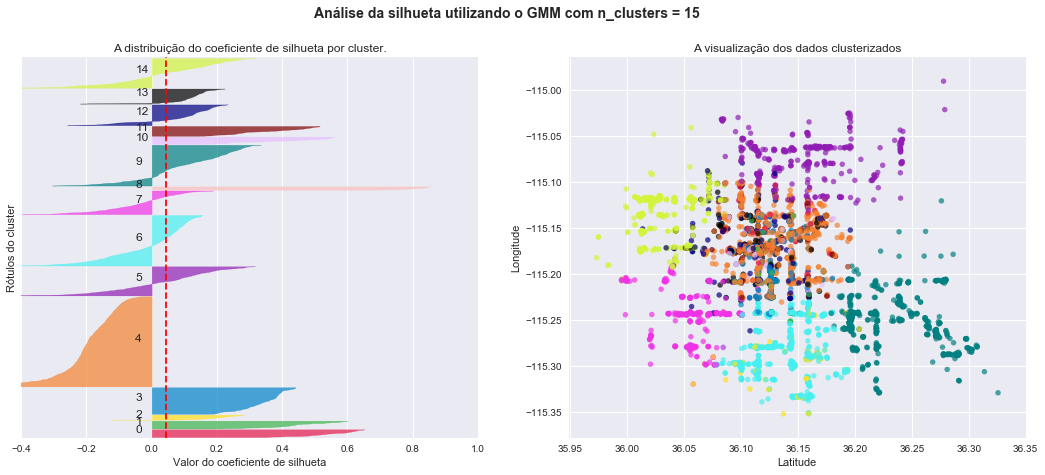

In [65]:
silhouette_analysis(data_gmm, 15, "GMM")

Para o GMM, o número de grupos escolhidos foi 15.

### Agrupamento Espectral

Para o agrupamento espectral, foi escolhido um peso $\alpha$ de $3.5$ para a latitude e longitude empiricamente. Esse valor foi variado no intervalo $[2.0, 4.5]$, com um incremento de $0.5$, sendo esse o melhor resultado na opinião dos autores. Os parâmetros *eigen_solver* e *affinity* foram variados, e foi escolhido deixar o *eigen_solver* = 'arpack' e o *affinity* como o *defaut*.

In [117]:
data_spectral = data_analysis.copy()
data_spectral["latitude"] *= 3.5
data_spectral["longitude"] *= 3.5

Para n_clusters =  10 , o silhouette_score médio é: 0.1334991301594826


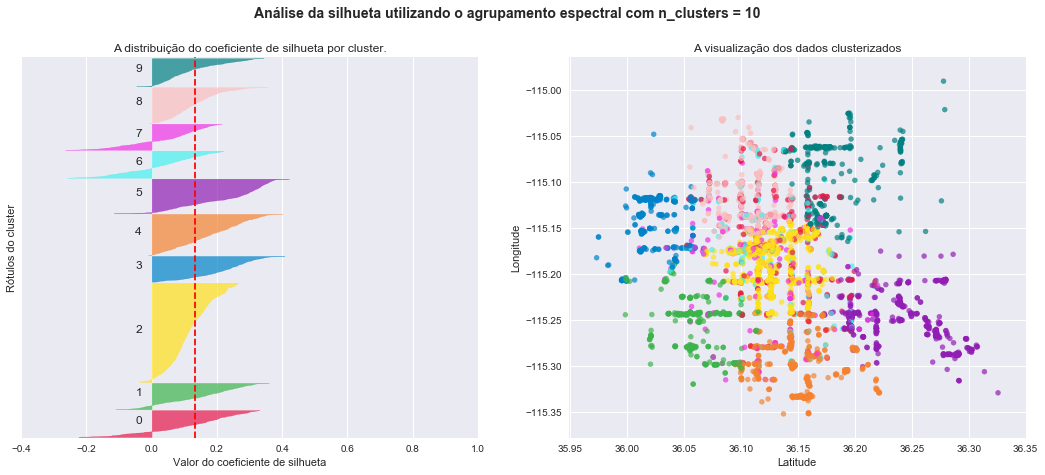

In [36]:
silhouette_analysis(data_spectral, 10, "agrupamento espectral")

Para n_clusters =  11 , o silhouette_score médio é: 0.11874904850013902


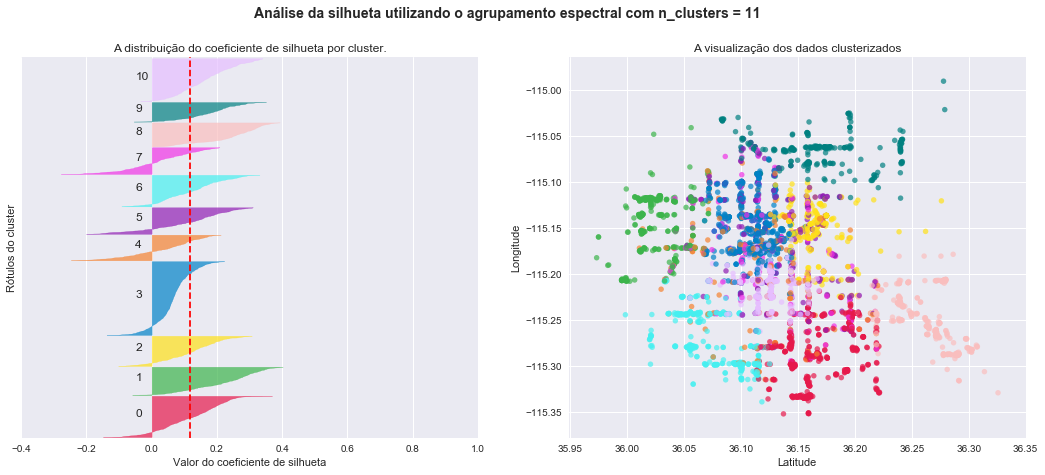

In [37]:
silhouette_analysis(data_spectral, 11, "agrupamento espectral")

Para n_clusters =  12 , o silhouette_score médio é: 0.12655283782828788


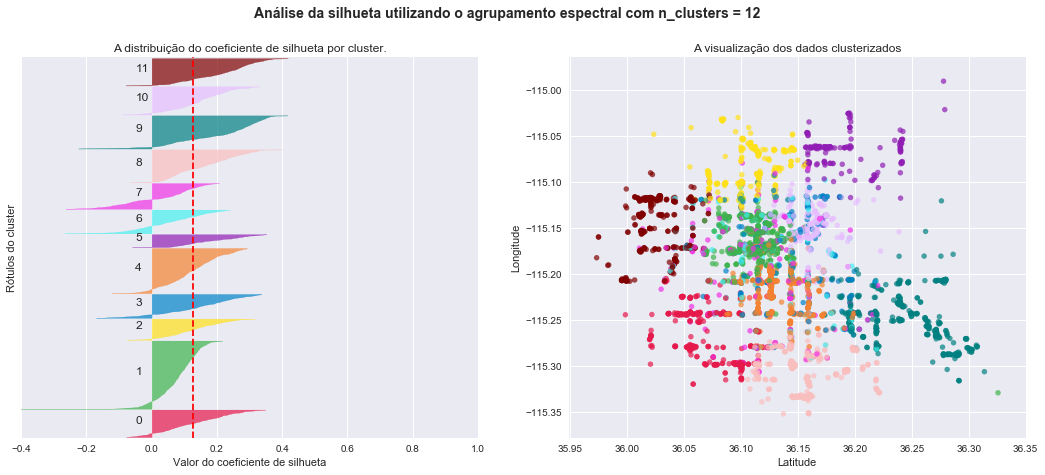

In [38]:
silhouette_analysis(data_spectral, 12, "agrupamento espectral")

Para n_clusters =  13 , o silhouette_score médio é: 0.11293690930706003


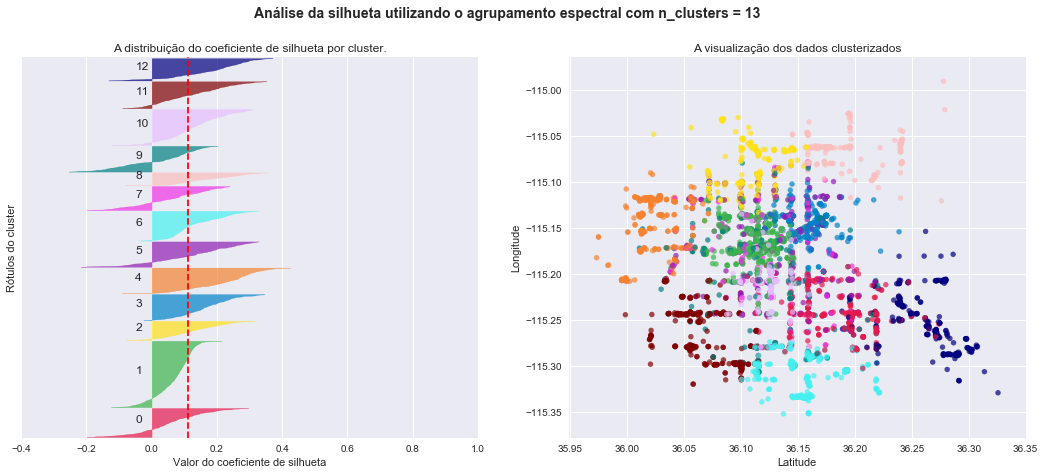

In [39]:
silhouette_analysis(data_spectral, 13, "agrupamento espectral")

Para n_clusters =  14 , o silhouette_score médio é: 0.1276704158366801


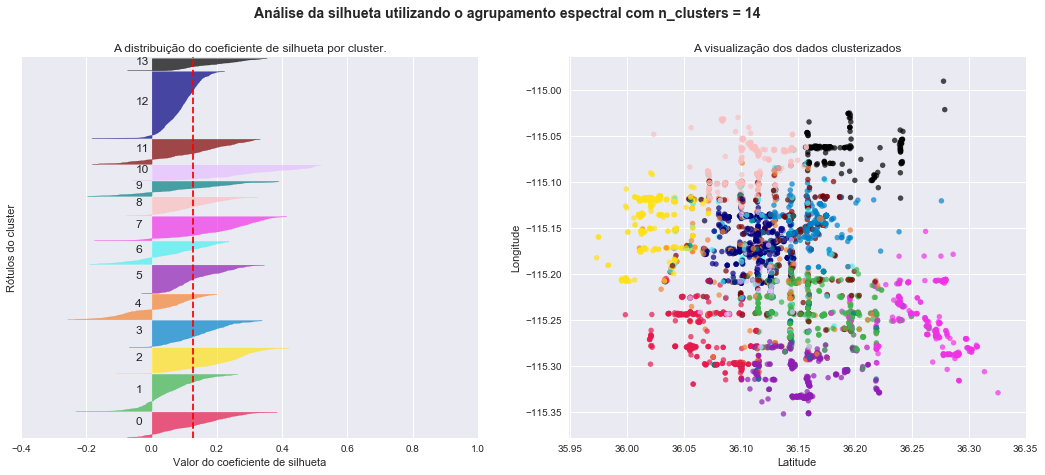

In [40]:
silhouette_analysis(data_spectral, 14, "agrupamento espectral")

Para n_clusters =  15 , o silhouette_score médio é: 0.12219193310309151


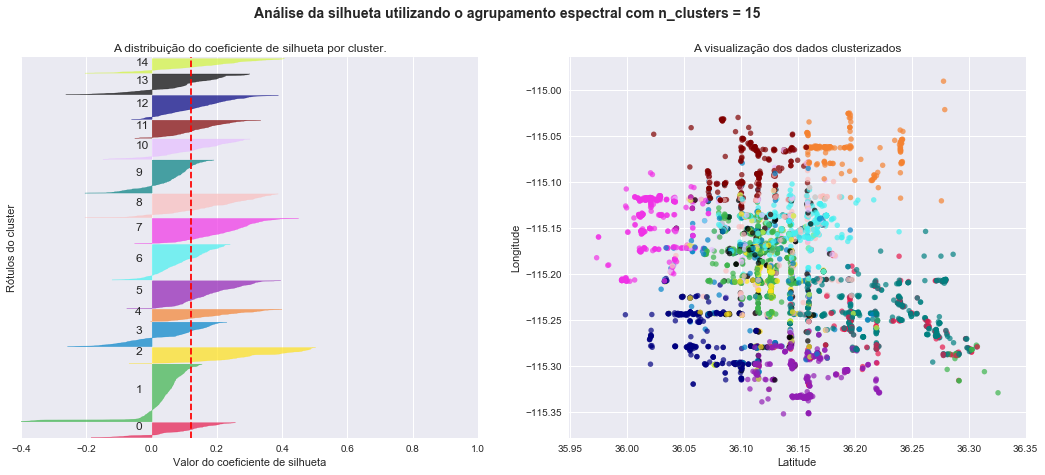

In [41]:
silhouette_analysis(data_spectral, 15, "agrupamento espectral")

Para o agrupamento espectral, o número de grupos escolhidos foi 15.

### Dendograma para o agrupamento hierárquico

### Criando rótulos para os grupos

Para caracterizar os grupos, a estratégia utilizada foi contar quais as categorias que mais aparecem em cada grupo, escolher um subconjunto dessas categorias que não se repetem em nenhum grupo, e esse subconjunto de categorias ser o rótulo do grupo.

In [156]:
categories_kmeans, data_kmeans_labels = create_cluster_labels(data_kmeans, 15, "k-means", 6)


======  3 ======

Categorias repetidas para n_clusters =  15
Cluster  3  e Cluster  6
Fast Food Burgers Sandwiches 
Fast Food Burgers Sandwiches 


Categorias repetidas para n_clusters =  15
Cluster  8  e Cluster  14
Mexican Fast Food Tex-Mex 
Mexican Fast Food Tex-Mex 


======  4 ======
Sem categoria repetida.


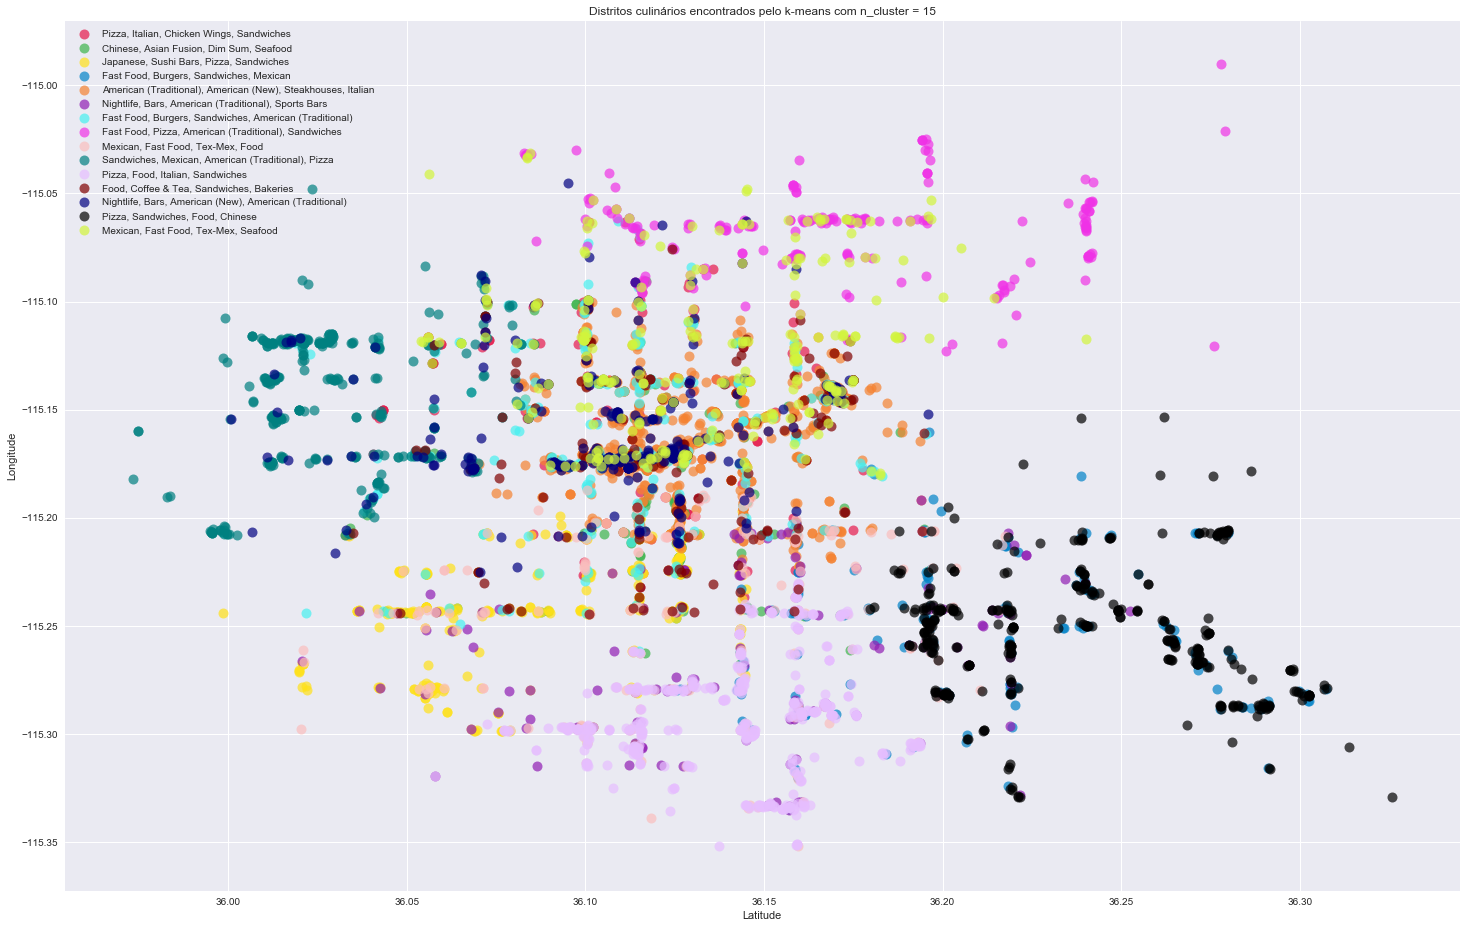

In [157]:
clusterization_plot(categories_kmeans, data_kmeans_labels, "k-means")

In [158]:
categories_hier, data_hier_labels = create_cluster_labels(data_hier, 15, "agrupamento hiérarquico", 6)


======  3 ======
Sem categoria repetida.


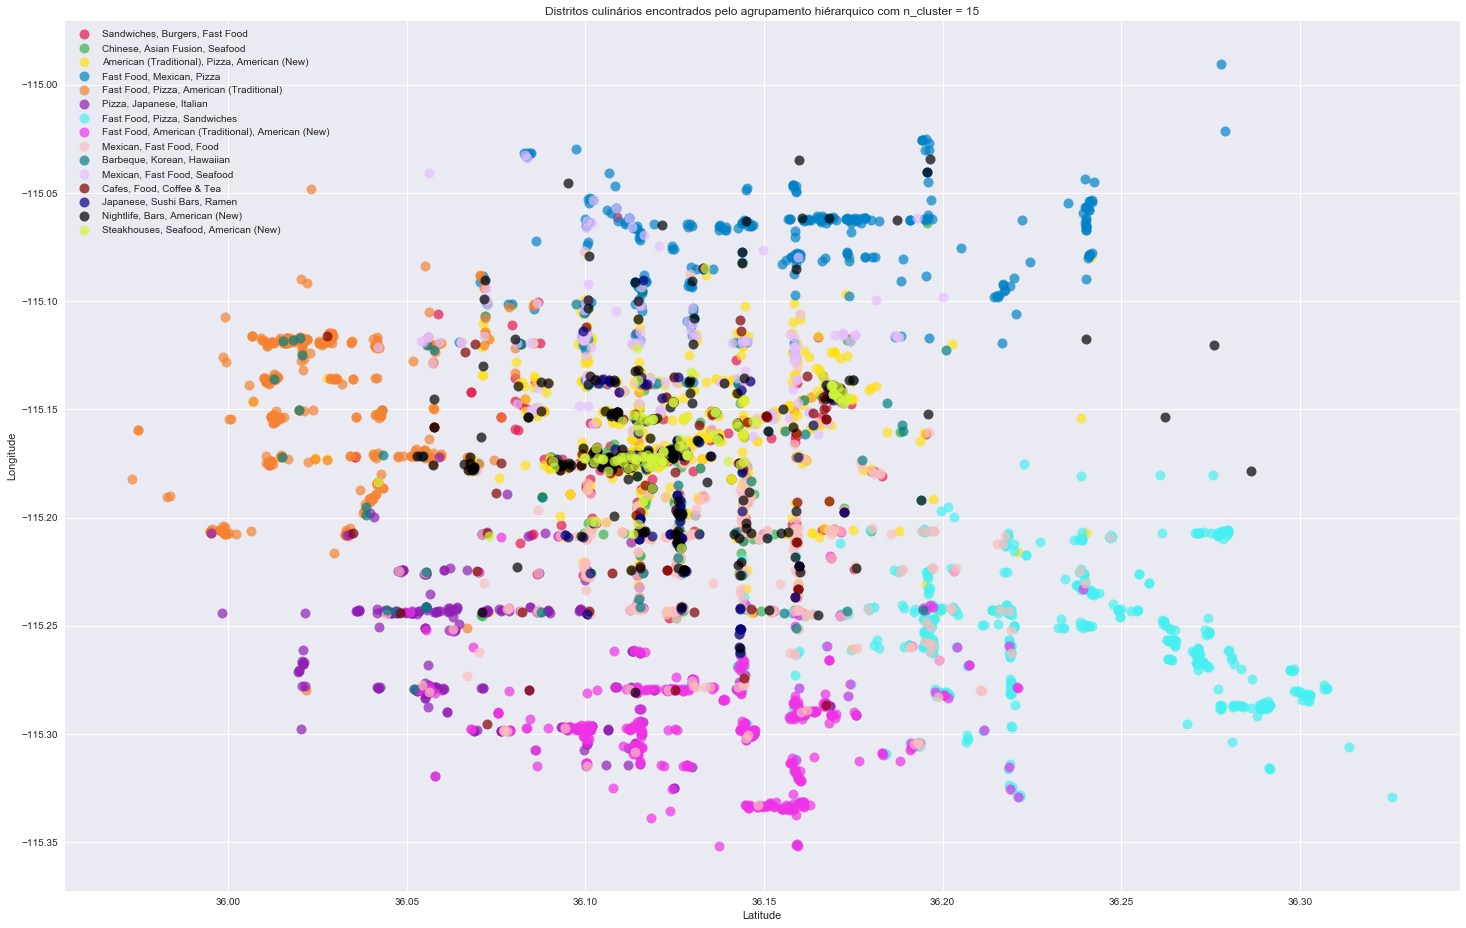

In [159]:
clusterization_plot(categories_hier, data_hier_labels, "agrupamento hiérarquico")

In [160]:
categories_gmm, data_gmm_labels = create_cluster_labels(data_gmm, 15, "GMM", 10)


======  3 ======

Categorias repetidas para n_clusters =  15
Cluster  0  e Cluster  12
Fast Food Mexican Pizza 
Fast Food Pizza Mexican 


Categorias repetidas para n_clusters =  15
Cluster  0  e Cluster  14
Fast Food Mexican Pizza 
Fast Food Mexican Pizza 


Categorias repetidas para n_clusters =  15
Cluster  12  e Cluster  14
Fast Food Pizza Mexican 
Fast Food Mexican Pizza 


======  4 ======
Sem categoria repetida.


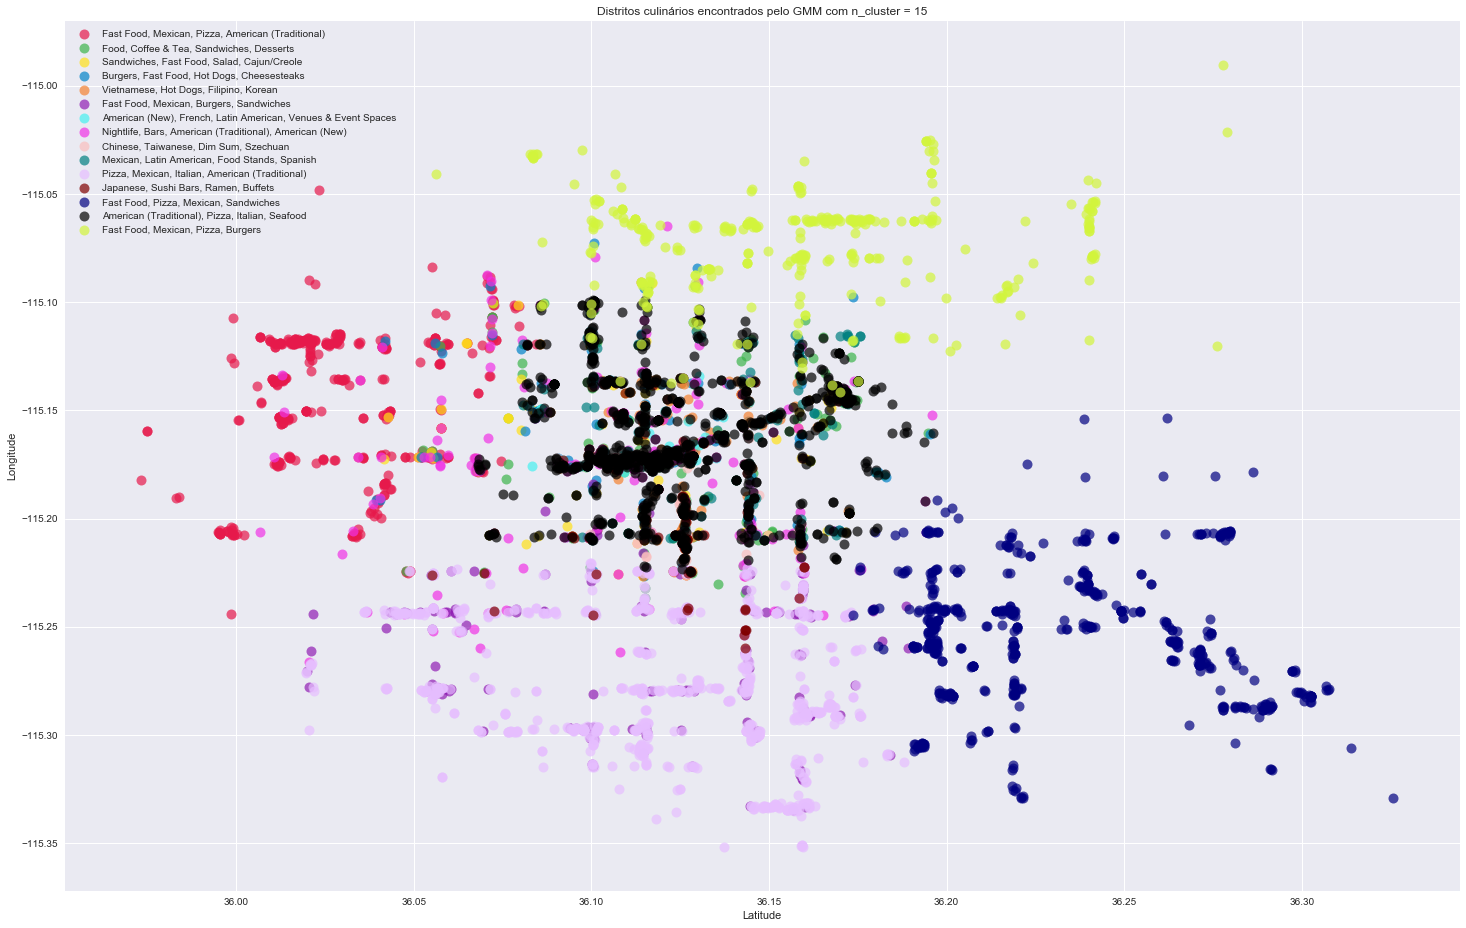

In [161]:
clusterization_plot(categories_gmm, data_gmm_labels, "GMM")

In [162]:
categories_spectral, data_spec_labels = create_cluster_labels(data_spectral, 15, "agrupamento espectral", 6)


======  3 ======
Sem categoria repetida.


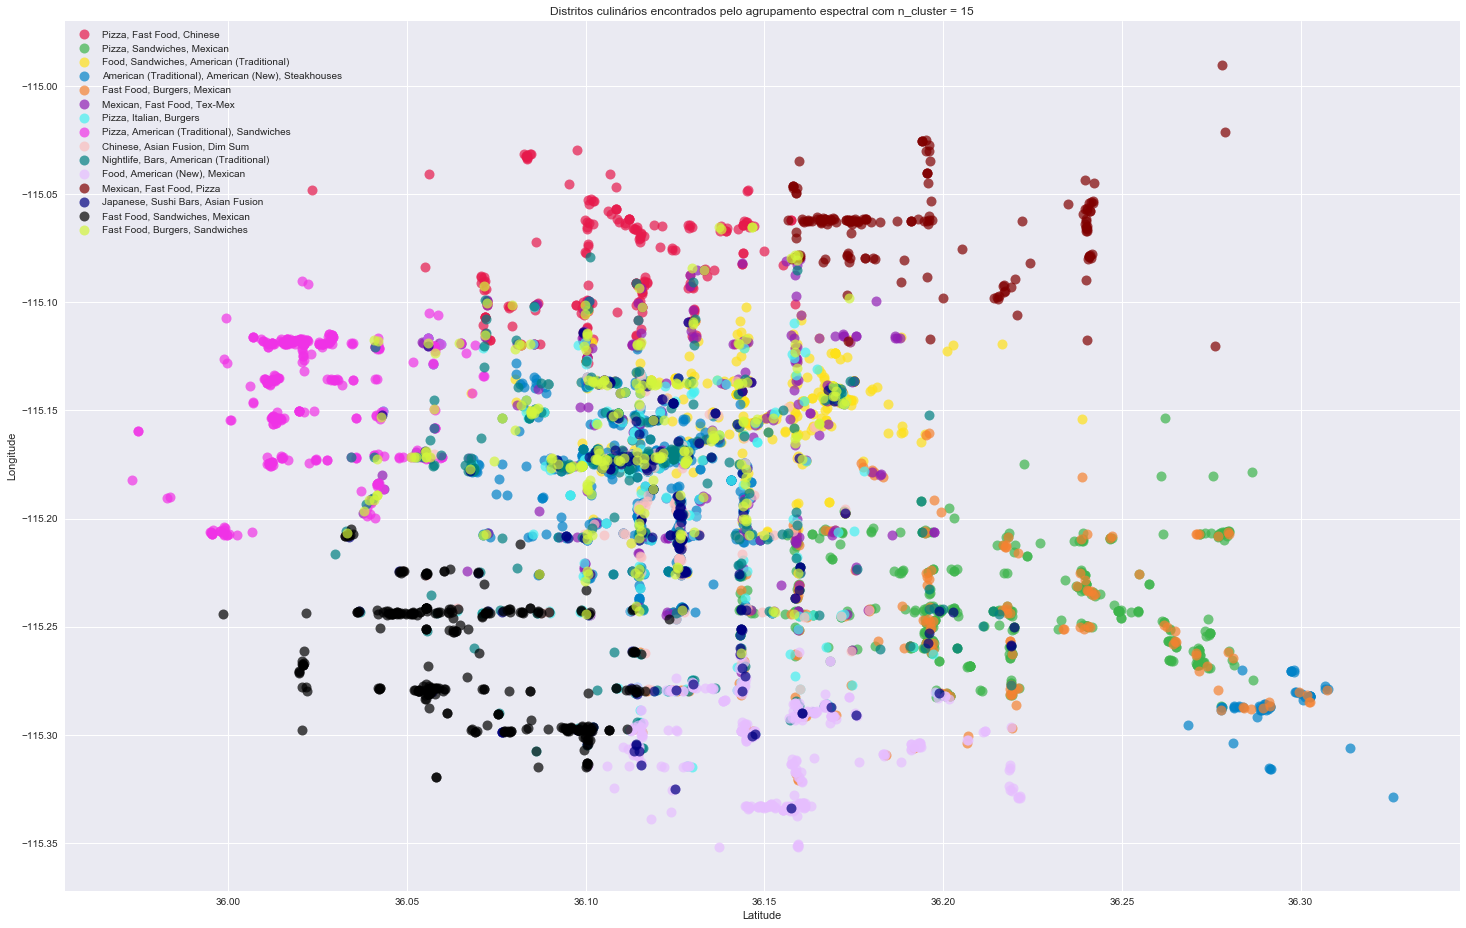

In [163]:
clusterization_plot(categories_spectral, data_spec_labels, "agrupamento espectral")

### Resultados e comentários finais

Trabalhar com dados reais e difíceis de separar foi um desafio para os autores. Foram testadas várias abordagens, e muitas delas deram um resultado muito ruim. Nesse conjunto de dados, os algoritmos encontram grupos com algum ruído, mas o resultado é aceitável. Os algoritmos são diferentes só pelo motivo de precisarem de valores de $\alpha$ diferentes para conseguirem separar. Na opinião dos autores, os algoritmos que mais tem dificuldade em separar são o k-means e o GMM, já que em algumas execuções eles repetem um número maior de categorias. Como a forma dos grupos não é convexa, isso faz sentido, como discutido com o professor Giovanni. O agrupamento espectral dá o resultado mais interessante, ou seja, com menos ruídos, seguido pelo agrupamento hierárquico. 
Entre os agrupamentos, o k-means e o agrupamento hiérárquico tem uma forma bem parecida, sendo diferenciados pela quantidade de ruído maior no primeiro do que no segundo. O GMM tem grupos que são ruídos, mas tem alguns grupos bem definidos por posição geográfica, sem nenhum ruído. Já o agrupamento espectral acha uma forma ligeiramente diferente dos outros, com menos ruído e sutís diferenças entre as formações de grupos.

## Parte II

O objetivo dessa parte é o mesmo da Parte I (de **(a)** a **(f)**). Mas agora, vocês não poderão utilizar o atributo `categories`. Vocês deverão "inferir as categorias" de cada restaurante a partir de seus respectivos _reviews_ no Yelp.
O arquivo `yelp_academic_dataset_review.json` contém uma coleção de _reviews_, novamente, cada linha (_review_) é um _json_, como o do exemplo abaixo.

Através do atributo `business_id` você pode identificar todos os _reviews_ 
de cada restaurante em Las Vegas. Além desse atributo, necessita-se apenas do atributo `text`, i.e., o conteúdo do _review_.




In [2]:
import json
line = '{"funny": 0, "user_id": "bv2nCi5Qv5vroFiqKGopiw", "review_id": "n6QzIUObkYshz4dz2QRJTw", "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \\n\\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \\n\\nA bit outside of downtown montreal but take the metro out and it\'s less than a 10 minute walk from the station.", "business_id": "VR6GpWIda3SfvPC-lg9H3w", "stars": 5, "date": "2016-05-28", "useful": 0, "cool": 0}'
print(json.dumps(json.loads(line), indent = 3))

{
   "funny": 0,
   "user_id": "bv2nCi5Qv5vroFiqKGopiw",
   "review_id": "n6QzIUObkYshz4dz2QRJTw",
   "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
   "business_id": "VR6GpWIda3SfvPC-lg9H3w",
   "stars": 5,
   "date": "2016-05-28",
   "useful": 0,
   "cool": 0
}


## Resolução da Parte II

### Inclusões de bibliotecas

In [1]:
import json
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (25, 16)
plt.rcParams['font.size'] = 24.0

### Leitura dos arquivos business e reviews 

É feita a criação de um novo arquivo csv data_pt2 onde cada business_id tem todas suas reviews e coordenadas associadas a ele

In [2]:
# leitura dos dados da primeira parte para obter as coordenadas
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r")

ids = {}
ids["business_id"] = []
ids["latitude"] = []
ids["longitude"] = []
attributes = ['latitude', 'longitude']
data_p2_dict = {}

for line in input_file:
    restaurant = json.loads(line)
    if "Restaurants" in restaurant["categories"] and restaurant["city"] == "Las Vegas":
        ids["business_id"].append(restaurant["business_id"])
        ids["latitude"].append(restaurant["latitude"])
        ids["longitude"].append(restaurant["longitude"])
        
input_file.close();

#leitura dos dados do arquivo review para associar cada restaurante com suas respectivas avaliações
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json", "r")

data_p2_dict["business_id"] = []
data_p2_dict["text"] = []
data_p2_dict["latitude"] = []
data_p2_dict["longitude"] = []

for line in input_file:
    restaurant = json.loads(line)
    if (restaurant["business_id"] in ids["business_id"]):
        index = ids["business_id"].index(restaurant["business_id"])
        if(restaurant["business_id"] in data_p2_dict["business_id"]):
            index_dict = data_p2_dict["business_id"].index(restaurant["business_id"])
            data_p2_dict["text"][index_dict].append(restaurant["text"])
        else:
            data_p2_dict["business_id"].append(restaurant["business_id"])
            data_p2_dict["text"].append([restaurant["text"]])
            data_p2_dict["latitude"].append(ids["latitude"][index])
            data_p2_dict["longitude"].append(ids["longitude"][index])
        
input_file.close()

#escrita dos dados em um arquivo csv
df_p2 = pd.DataFrame(data_p2_dict)
df_p2.to_csv("data/data_pt2.csv", index=False)

# data_p2 = pd.read_csv("data/data_pt2.csv")
df_p2.info(verbose=False, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 4 entries, business_id to text
dtypes: float64(2), object(2)

### Cálculo do TF-IDF

É feito o cálculo do TF-IDF de cada business_id em relação às suas reviews. Para cada termo encontrado, o TfidfVectorizer retorna uma matriz 1xN, onde N é a quantidade de reviews que o business_id em questão tem. Como precisamos de um único valor para cada termo, é feita uma média aritmética com os valores dessa matriz. Depois disso, é feita uma matriz contendo os scores TF-IDF de cada business_id para cada um dos termos encontrados que é salva no arquivo csv data_pt2_names.


In [3]:
#lista que relaciona cada restaurante com os termos principais de suas avaliacoes
terms_list = []
#conjunto contendo todos os termos principais obtidos através do TF-IDF
feature_names = set()

#criação da matriz de tf-idf
for reviews in df_p2["text"]:    
    vectorizer = TfidfVectorizer(min_df=0.2, norm = "l2", use_idf = "true", stop_words="english")
    tfidf = vectorizer.fit_transform(reviews)
    feature_names.update(vectorizer.get_feature_names())
    idf = vectorizer.idf_
    #lista onde serão atribuídas as médias dos tf-idf de cada termo encontrado pelo tf-idf para o restaurante em questão
    scores = []
    for i in range(0,tfidf.shape[1]):
        scores.append((sum(tfidf[:,i].toarray())/len(tfidf[:,i].toarray()))[0])
    terms_list.append(dict(zip(vectorizer.get_feature_names(), scores)))
    
feature_names = list(feature_names)
feature_names.sort()

#obtenção e normalização dos dados das coordenadas de cada restaurante
latitudes = df_p2["latitude"]
longitudes = df_p2["longitude"]

for column in latitudes:
    latitudes = (latitudes - latitudes.min()) / (latitudes.max() - latitudes.min())
    
for column in longitudes:
    longitudes = (longitudes - longitudes.min()) / (longitudes.max() - longitudes.min())

#estrutura contendo a pontuação de cada termo principal para cada restaurante. Quando um termo não possui 
#valor atríbuido para um determinado restaurante, é atribuído valor nulo a ele
content = {}
for name in feature_names:
    content[name] = []
    for item in terms_list:
        if name in item:
            content[name].append(item[name])
        else:
            content[name].append(0)

#conversão da estrutura dos nomes para dataframe e escrita em um arquivo csv
data_names = pd.DataFrame(content)
data_names.info(verbose=False, memory_usage=False)
data_names.to_csv("data/data_pt2_names.csv", index=False)

#conversão da estrutura das coordenadas normalizadas para dataframe e escrita em um arquivo csv
coordinates = pd.DataFrame()
coordinates["latitude"] = latitudes
coordinates["longitude"] = longitudes
coordinates.to_csv("data/data_pt2_coordinates.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 12864 entries, 00 to 焼きたてのガーリックブレッドは大変美味しかったです
dtypes: float64(12864)

### Cálculo do PCA sobre a matriz de TF-IDF

Como foram encontrados mais de 13 mil termos, é feito um PCA para reduzir a dimensionalidade da matriz

In [4]:
#leitura dos dados obtidos para que não seja necessária a execução do trecho anterior
data_names = pd.read_csv("data/data_pt2_names.csv")
#centralização dos dados
centralized_data_names = data_names - data_names.mean()
pca = PCA(n_components=len(feature_names))
data_names_pca = pca.fit_transform(centralized_data_names)
#criação de uma estrutura contendo a variância explicada
names_variance = pca.explained_variance_ratio_ 

#conversão da estrutura dos nomes após aplicação do PCA para dataframe e escrita em um arquivo csv
df_pca_names = pd.DataFrame(data_names_pca)
df_pca_names.to_csv("data/data_pt2_names_pca.csv", index=False)

### Calculando número de componentes para capturar a porcentagem desejada da variância

In [5]:
soma = 0
j = 0
per_variancia = 0.9
for i in range(0,len(names_variance)):
    soma = soma + names_variance[i]
    if(soma >= per_variancia):
        j = i
        break
print('Número de dimensões necessárias para capturar ', str(per_variancia*100), '% da variância: ', str(j))

Número de dimensões necessárias para capturar  90.0 % da variância:  632


In [6]:
#leitura de todos os dados obtidos anteriormente para que não seja necessária sua execução
df_pca_names = pd.read_csv("data/data_pt2_names_pca.csv")
df_pca_names.drop(df_pca_names.columns[524:],axis = 1, inplace = True)

coordinates = pd.read_csv("data/data_pt2_coordinates.csv")
df_pca_names["latitude"] = coordinates["latitude"]
df_pca_names["longitude"] = coordinates["longitude"]

## Agrupamentos

### Funções utilizadas

Para simplificar o código, estamos utilizando a função de agrupamento e plotagem de gráficos `silhouette_analysis` definida na primeira parte, porém com algumas mudanças na parte de rotulamento de grupos

In [66]:
#leitura da matriz de restaurante x termos principais com acréscimo das colunas de latitude e longitude
data = pd.read_csv("data/data_pt2_names.csv")

coordinates = pd.read_csv("data/data_pt2_coordinates.csv")
data["latitude"] = coordinates["latitude"]
data["longitude"] = coordinates["longitude"]


def silhouette_analysis(data_analysis, n_clusters, method="k-means"):
    #agrupamento
    if method == "k-means":
        clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "agrupamento hiérarquico":
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "GMM":
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type='spherical').fit(data_analysis)
        cluster_labels = clusterer.predict(data_analysis)
    else:
        clusterer = SpectralClustering(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    
    
            
    #plotagem dos gráficos    
    sns.set()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_analysis) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(data_analysis, cluster_labels)
    print("Para n_clusters = ", n_clusters,
          ", o silhouette_score médio é:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(
        data_analysis, cluster_labels)

    y_lower = 10

    colors_vec = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#fabebe", "#008080",
                  "#e6beff", "#800000", "#000080", "#000000", "#d2f53c", "#808080"]

    color = sns.color_palette(colors_vec)
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("A distribuição do coeficiente de silhueta por cluster.")
    ax1.set_xlabel("Valor do coeficiente de silhueta")
    ax1.set_ylabel("Rótulos do cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = [color[i] for i in cluster_labels]
    ax2.scatter(data["latitude"].as_matrix(), data["longitude"].as_matrix(),
                marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("A visualização dos dados clusterizados")
    ax2.set_xlabel("Latitude")
    ax2.set_ylabel("Longitude")

    plt.suptitle(("Análise da silhueta utilizando o " + method + " com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [14]:
def create_cluster_labels(data_analysis, n_clusters, method="k-means"):
    if method == "k-means":
        clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "agrupamento hiérarquico":
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "GMM":
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type='spherical').fit(data_analysis)
        cluster_labels = clusterer.predict(data_analysis)
    else:
        clusterer = SpectralClustering(n_clusters=n_clusters, n_jobs=-1, eigen_solver='arpack')
        cluster_labels = clusterer.fit_predict(data_analysis)
        
        
    #pega a matriz de restaurante x termos principais e, para cada restaurante, acrescenta um campo indicando a qual grupo
    #ele pertence
    data_with_labels = data.copy()
    data_with_labels.insert(len(data_with_labels.columns), "cluster_label", cluster_labels)

    #realiza o rotulamento. Para um grupo G encontrado, fazemos seu rotulamento com base nos 20 termos que têm maior pontuação
    #dentro de G e que têm menor pontuação para os restaurantes fora de G, para isso pegamos a pontuação total de um termo,
    #obtemos a média aritmética dos restaurantes de G e a média aritmética dos que estão fora de G, subtraímos a primeira pela
    #segunda e pegamos os termos com maior resultado dessa subtração
    all_categories = []
    for i in range(n_clusters):
        data_in_label = data_with_labels[data_with_labels.cluster_label == i]
        data_in_cluster = data_in_label.drop(
            ["latitude", "longitude", "cluster_label"], axis=1)
        data_out_label = data_with_labels[data_with_labels.cluster_label != i]
        data_out_cluster = data_out_label.drop(
            ["latitude", "longitude", "cluster_label"], axis=1)
        data_cluster = data_in_cluster.mean() - 1.15*data_out_cluster.mean()    
        all_categories.append(
            data_cluster.sort_values(ascending=False)[1:20])
    return all_categories, data_with_labels

In [95]:
def clusterization_plot(labels, data_labels, method):
    colors_vec = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#fabebe", "#008080",
                  "#e6beff", "#800000", "#000080", "#000000", "#d2f53c", "#808080"]

    color = sns.color_palette(colors_vec)

    for index, value in enumerate(labels):
        new_label = ""
        for i, category in value.items():
            new_label += i + ", "
        labels[index] = new_label
        
    #plt.rcParams["figure.figsize"] = (40, 35)
    #plt.rcParams['font.size'] = 30.0
    
    plt.rcParams["figure.figsize"] = (25, 16)
    plt.rcParams['font.size'] = 26.0
    
    plots = []
    for cluster in range(0, data_labels["cluster_label"].max() + 1):
        data_cluster = data_labels[data_labels.cluster_label == cluster]
        plot = plt.scatter(data_cluster["latitude"].as_matrix(), data_cluster["longitude"].as_matrix(),
                    marker='o', s=100, lw=0, alpha=0.7, c=color[cluster], edgecolor='k')
        plots.append(plot)
        
    plt.legend(plots, labels)
    plt.title("Distritos culinários encontrados pelo " + method + " com n_cluster = " + str(len(labels)))
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

In [83]:
def plot_dendrogram(data_analysis, n_clusters):
    plt.rcParams["figure.figsize"] = (8,8)
    Z = linkage(data_analysis, 'ward')
    dendrogram(Z, truncate_mode='lastp', p=n_clusters, show_contracted = True)

    plt.title('Dendograma Reduzido do Agrupamento Hierárquico')
    plt.xlabel('Tamanho do grupo')
    plt.ylabel('Distância')
    plt.axhline(y = 0.8)
    plt.show()

### Kmeans

Foram mantidos o número de grupos e o método de parametrização das coordenadas geográficas definidas na parte I, estas com peso de $2.6$. Foi utilizada a configuração padrão de parâmetros do algoritmo. Com um número de clusters equivalente a 10, o algoritmo apresenta maior coeficiente de silhueta

Para n_clusters =  10 , o silhouette_score médio é: 0.13050621601004891


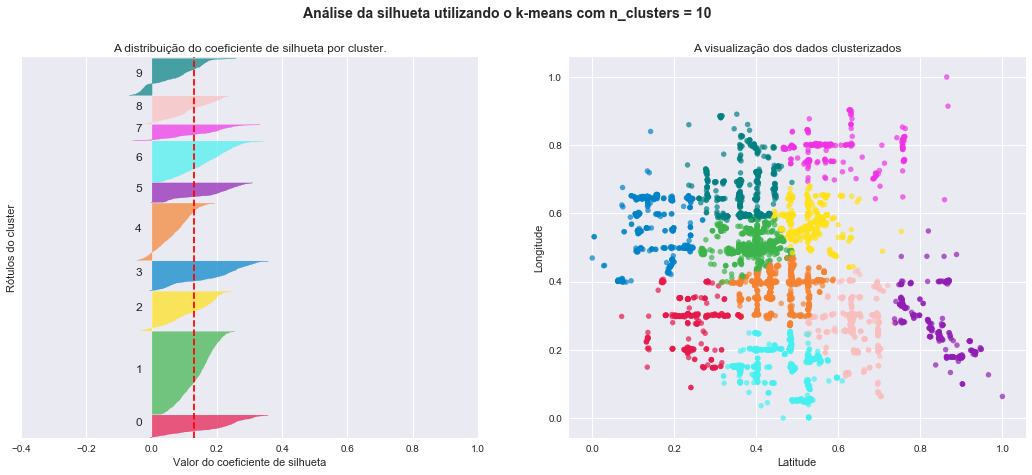

In [11]:
data_kmeans = df_pca_names.copy()
data_kmeans["latitude"] *= 2.6
data_kmeans["longitude"] *= 2.6
silhouette_analysis(data_kmeans, 10)

Para n_clusters =  11 , o silhouette_score médio é: 0.12471047243434734


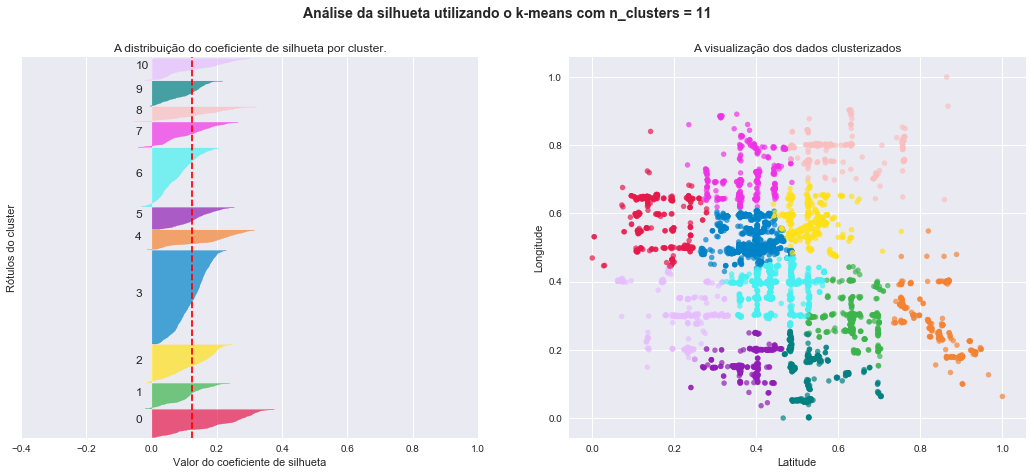

In [37]:
silhouette_analysis(data_kmeans, 11)

Para n_clusters =  12 , o silhouette_score médio é: 0.11785671529334027


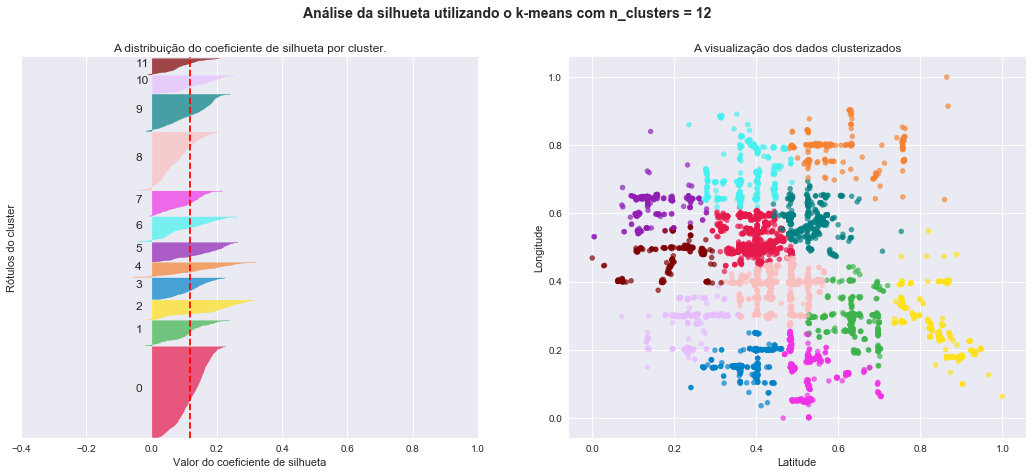

In [38]:
silhouette_analysis(data_kmeans, 12)

Para n_clusters =  13 , o silhouette_score médio é: 0.1106583796446243


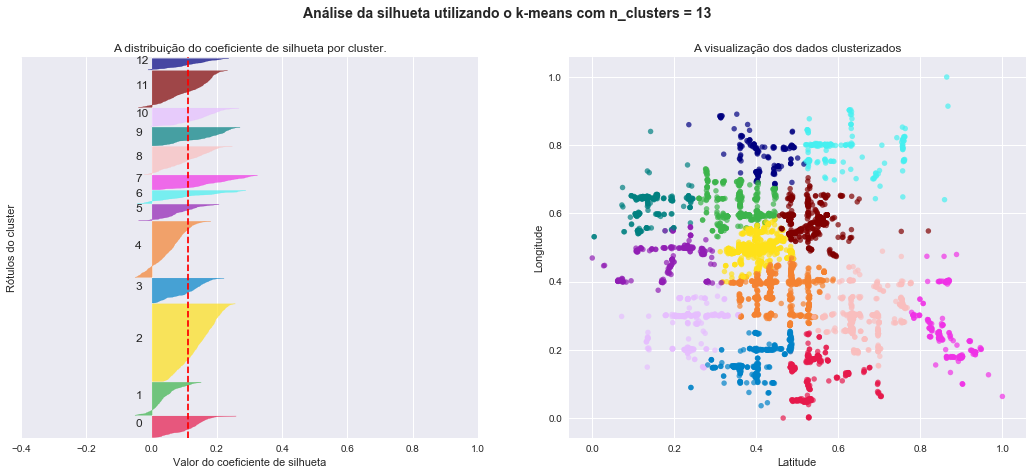

In [39]:
silhouette_analysis(data_kmeans, 13)

Para n_clusters =  14 , o silhouette_score médio é: 0.10166728713115052


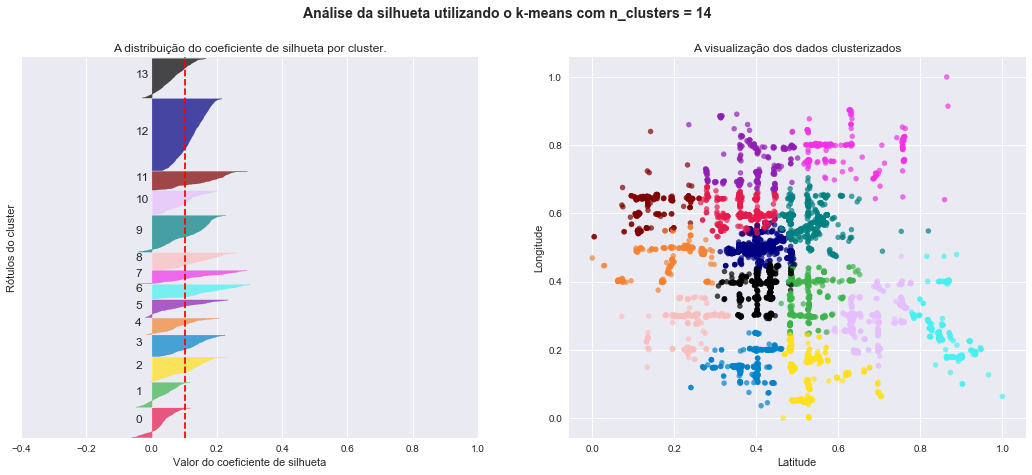

In [40]:
silhouette_analysis(data_kmeans, 14)

Para n_clusters =  15 , o silhouette_score médio é: 0.09993595841951906


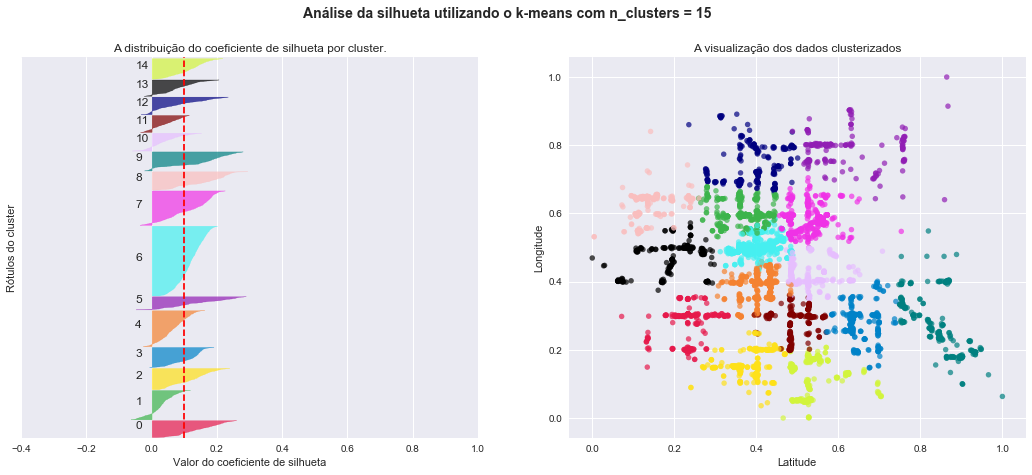

In [41]:
silhouette_analysis(data_kmeans, 15)

### Agrupamento Hierárquico

Foram mantidos o número de grupos e o método de parametrização das coordenadas geográficas definidas na parte I, estas com peso de $3$ por apresentar uma configuração bastante visual que, ao mesmo tempo, ainda contém "ruídos" decorrente dos atributos relacionados aos termos principais. Foi utilizada a configuração padrão de parâmetros do algoritmo com o método de $Ward$ para calcular a distância entre grupos. Com um número de clusters equivalente a 10, o algoritmo apresenta maior coeficiente de silhueta

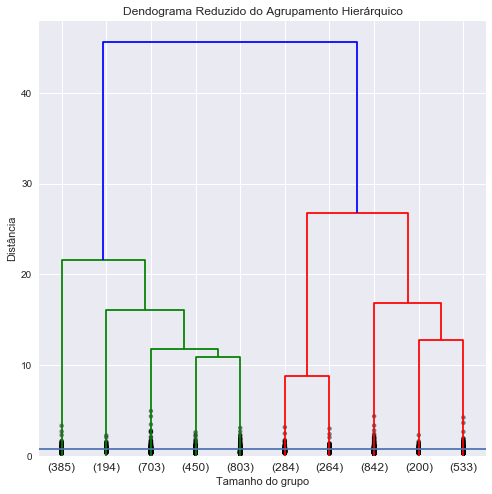

Para n_clusters =  10 , o silhouette_score médio é: 0.1209013542050713


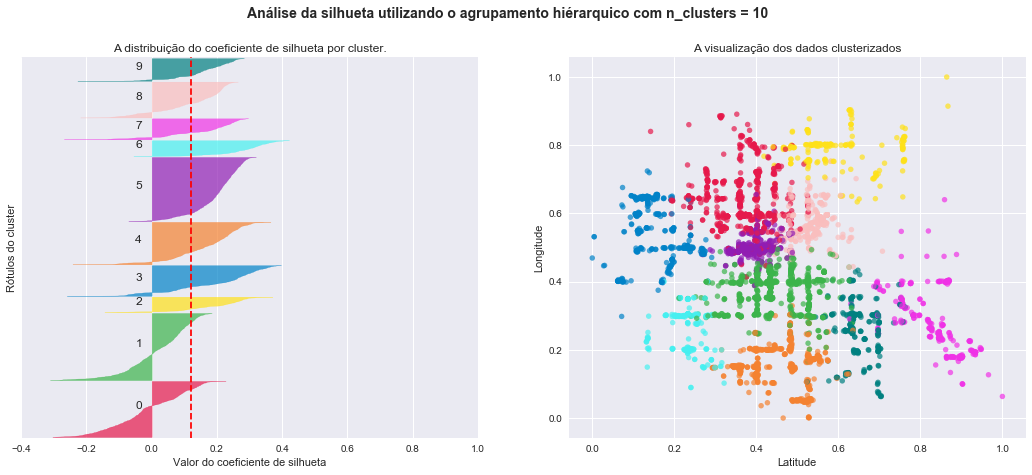

In [46]:
data_hierarchical = df_pca_names.copy()
data_hierarchical["latitude"] *= 3
data_hierarchical["longitude"] *= 3
silhouette_analysis(data_hierarchical, 10,"agrupamento hiérarquico")

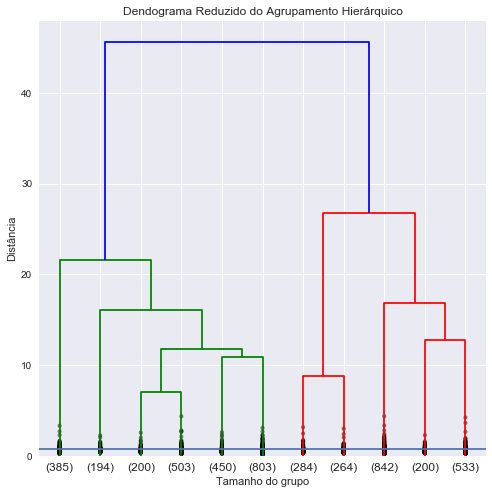

Para n_clusters =  11 , o silhouette_score médio é: 0.11554501147306975


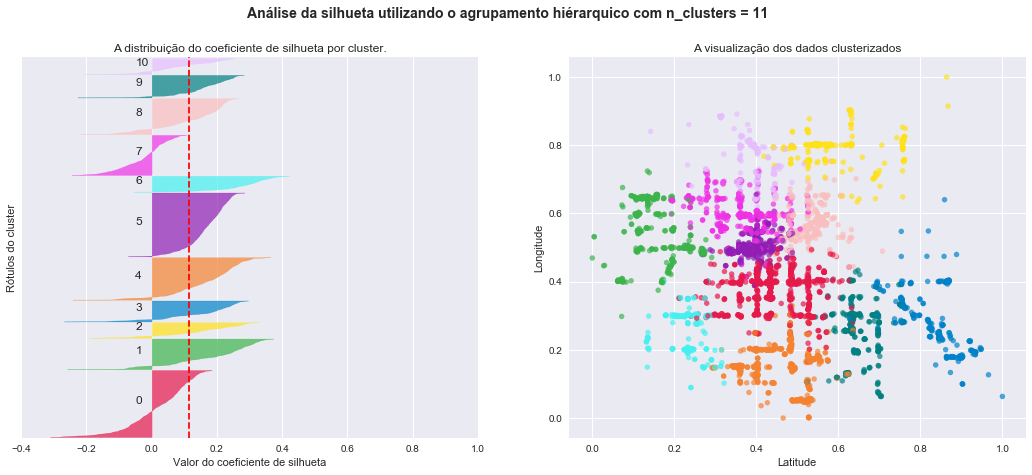

In [53]:
silhouette_analysis(data_hierarchical, 11,"agrupamento hiérarquico")

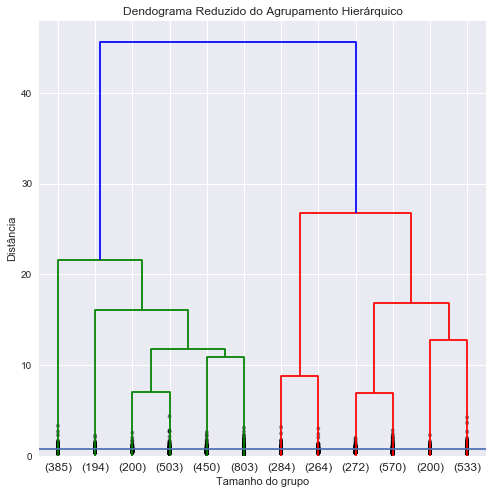

Para n_clusters =  12 , o silhouette_score médio é: 0.11264025745894002


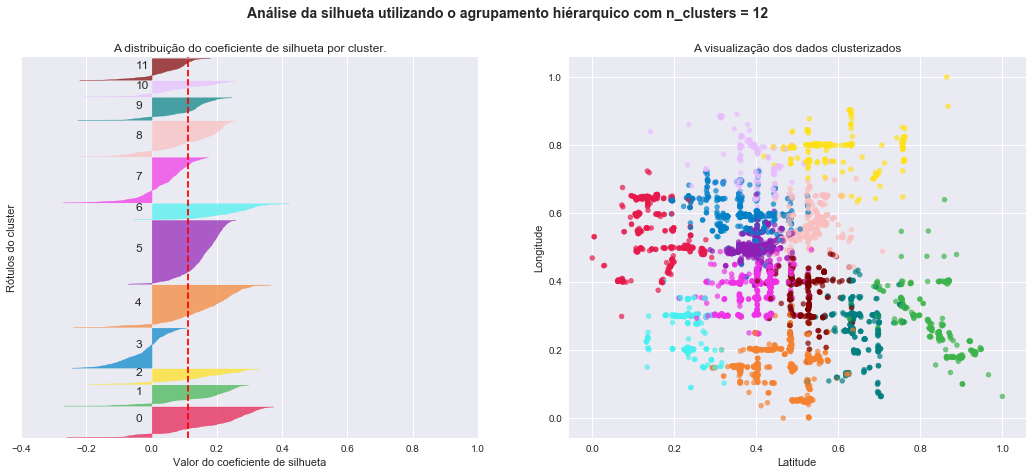

In [48]:
silhouette_analysis(data_hierarchical, 12,"agrupamento hiérarquico")

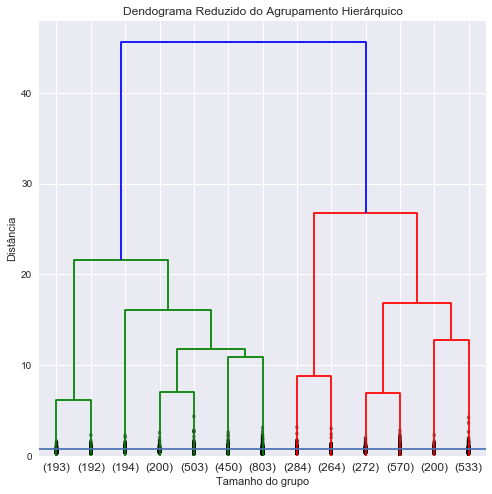

Para n_clusters =  13 , o silhouette_score médio é: 0.10731601360198352


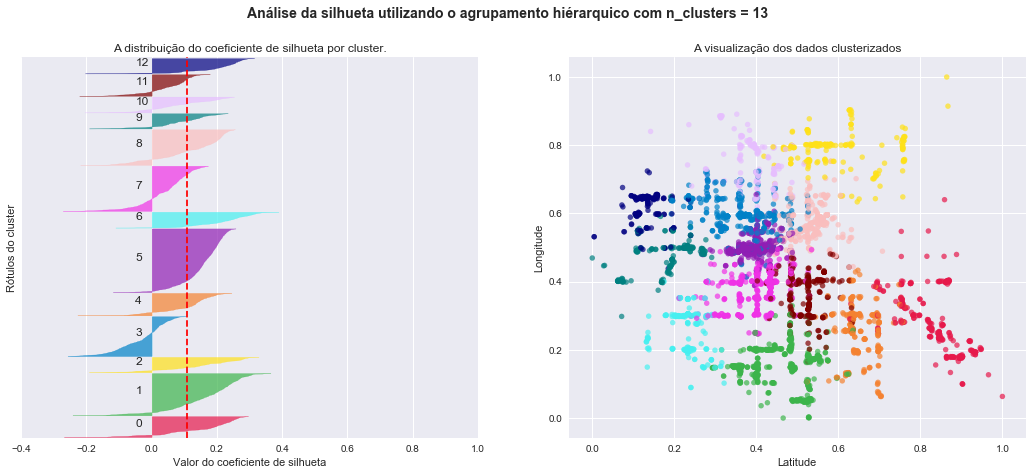

In [49]:
silhouette_analysis(data_hierarchical, 13,"agrupamento hiérarquico")

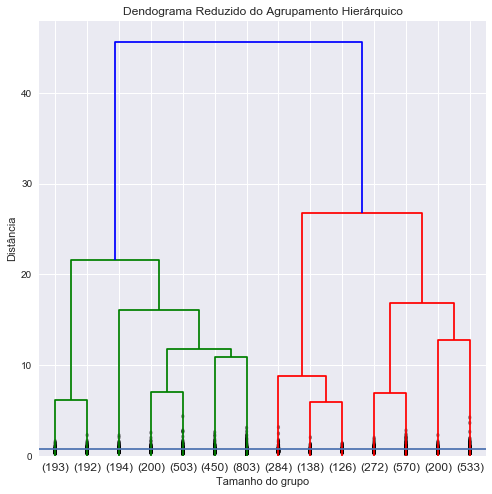

Para n_clusters =  14 , o silhouette_score médio é: 0.1071295314532746


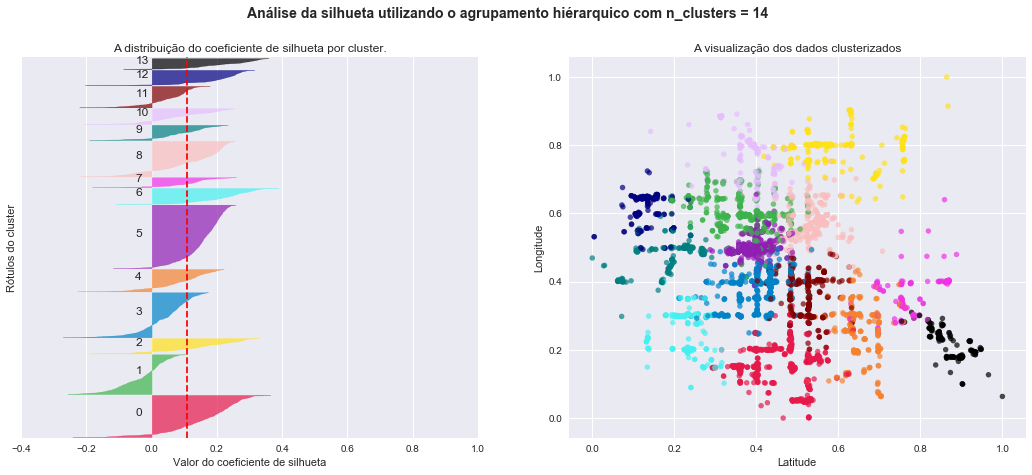

In [50]:
silhouette_analysis(data_hierarchical, 14,"agrupamento hiérarquico")

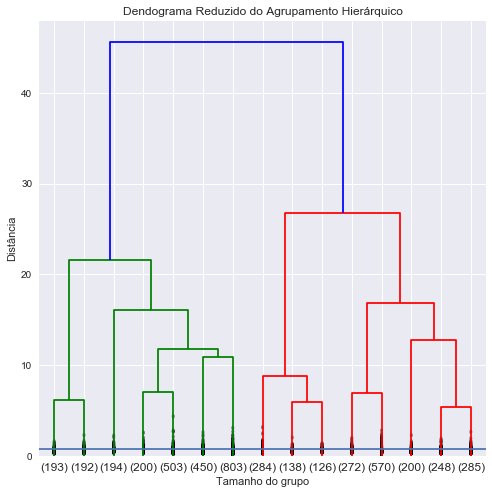

Para n_clusters =  15 , o silhouette_score médio é: 0.09541599473648393


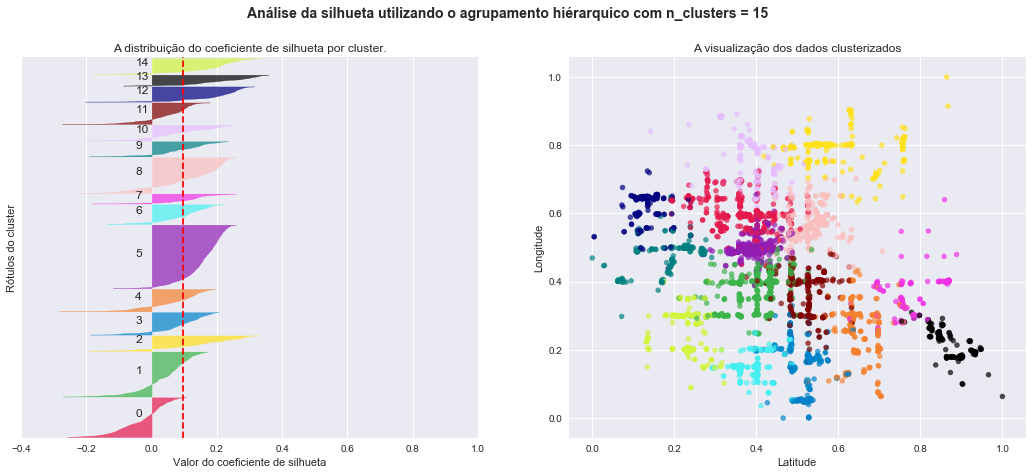

In [51]:
silhouette_analysis(data_hierarchical, 15,"agrupamento hiérarquico")

### GMM

Foram mantidos os pesos das coordenadas, número de grupos definidos e a implementação Default do algoritmo na parte I para esta implementação pelos mesmos apresentarem resultados bastantes satisfatórios. Com um número de clusters equivalente a 11, o algoritmo apresenta maior coeficiente de silhueta.

Para n_clusters =  10 , o silhouette_score médio é: 0.07099530814789133


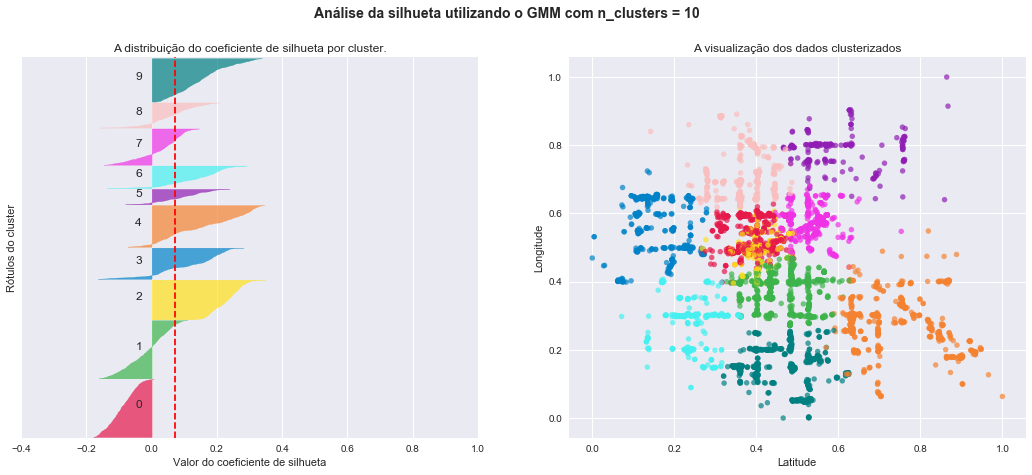

In [67]:
data_gmm = df_pca_names.copy()
data_gmm["latitude"] *= 2
data_gmm["longitude"] *= 2
silhouette_analysis(data_gmm, 10,"GMM")

Para n_clusters =  11 , o silhouette_score médio é: 0.06883223950694423


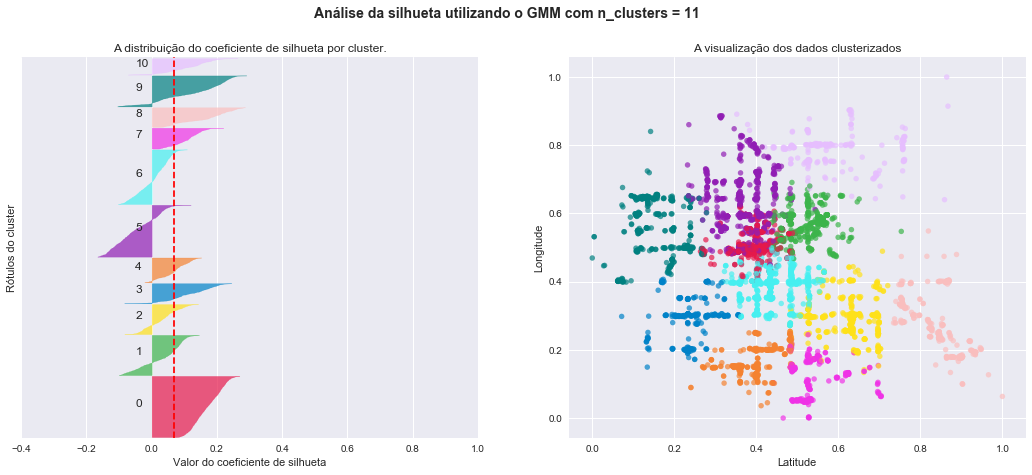

In [68]:
silhouette_analysis(data_gmm, 11,"GMM")

Para n_clusters =  12 , o silhouette_score médio é: 0.06652535168110786


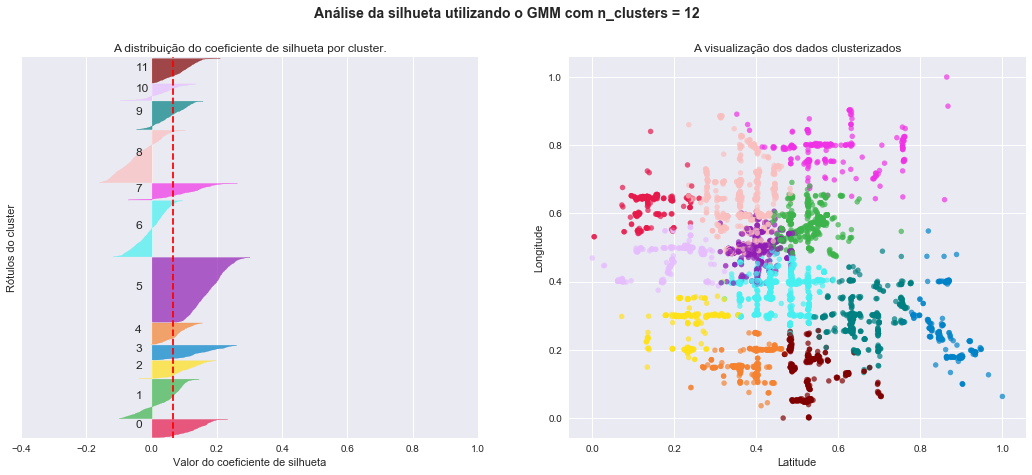

In [69]:
silhouette_analysis(data_gmm, 12,"GMM")

Para n_clusters =  13 , o silhouette_score médio é: 0.04457648323186279


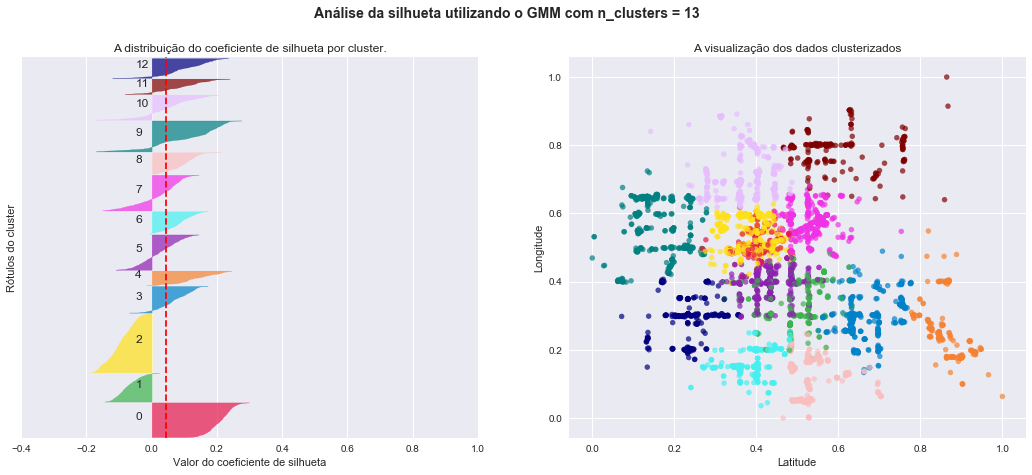

In [70]:
silhouette_analysis(data_gmm, 13,"GMM")

Para n_clusters =  14 , o silhouette_score médio é: 0.05661278246135173


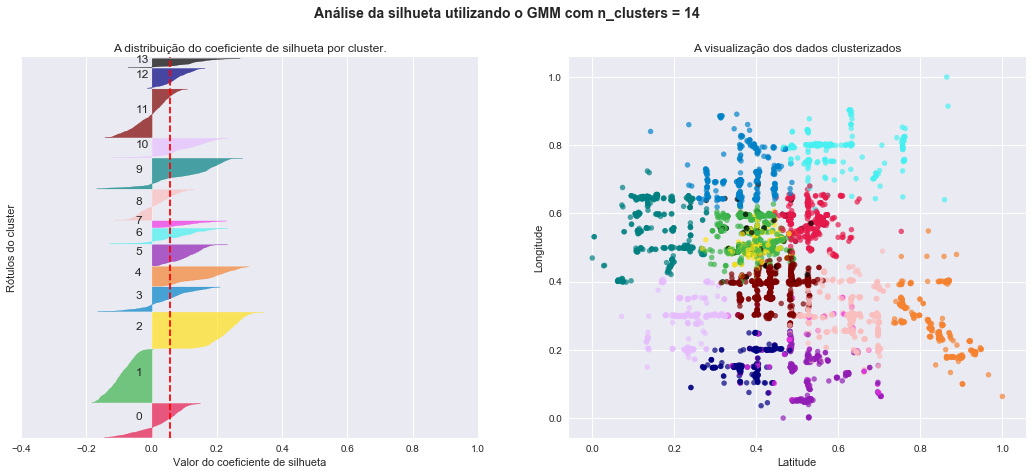

In [71]:
silhouette_analysis(data_gmm, 14,"GMM")

Para n_clusters =  15 , o silhouette_score médio é: 0.06390192158994766


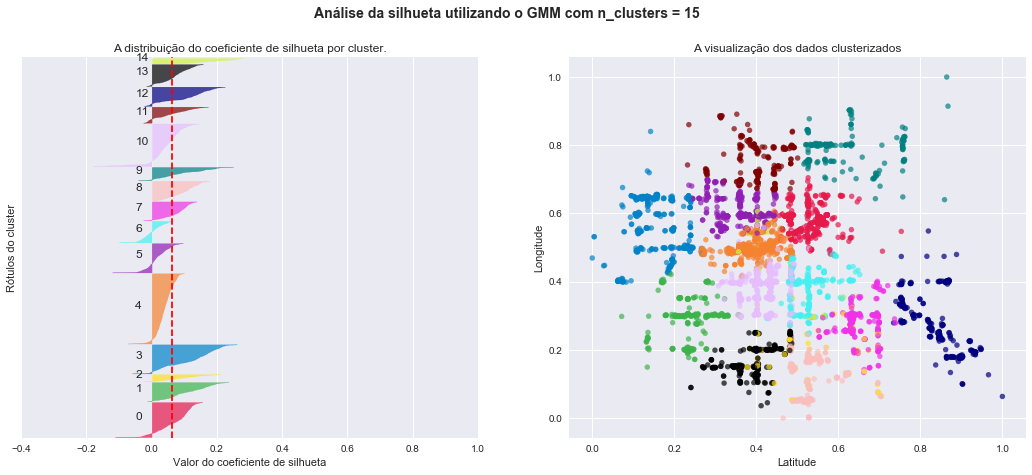

In [59]:
silhouette_analysis(data_gmm, 15,"GMM")

### Agrupamento espectral

Foram mantidos os pesos das coordenadas, número de grupos definidos e a implementação Default do algoritmo na parte I para esta implementação pelos mesmos apresentarem resultados bastantes satisfatórios. Com um número de clusters equivalente a 11, o algoritmo apresenta maior coeficiente de silhueta.

Para n_clusters =  10 , o silhouette_score médio é: 0.14600835706330606


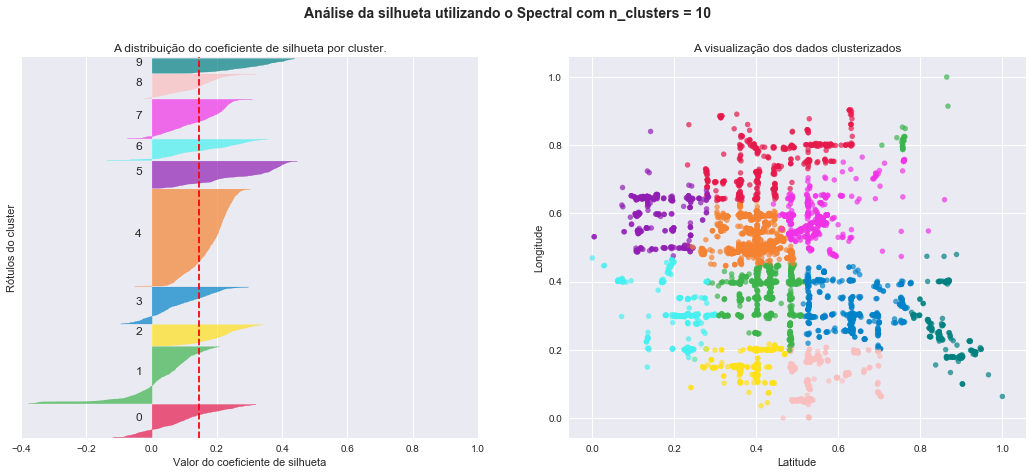

In [75]:
data_spectral = df_pca_names.copy()
data_spectral["latitude"] *= 3.1
data_spectral["longitude"] *= 3.1
silhouette_analysis(data_spectral, 10,"Spectral")

Para n_clusters =  11 , o silhouette_score médio é: 0.11080210353136319


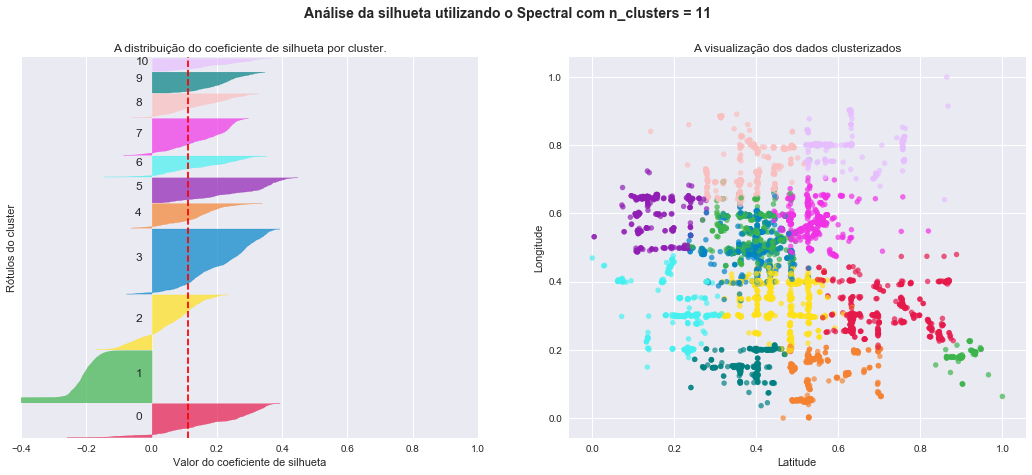

In [76]:
silhouette_analysis(data_spectral, 11,"Spectral")

Para n_clusters =  12 , o silhouette_score médio é: 0.09814488537974453


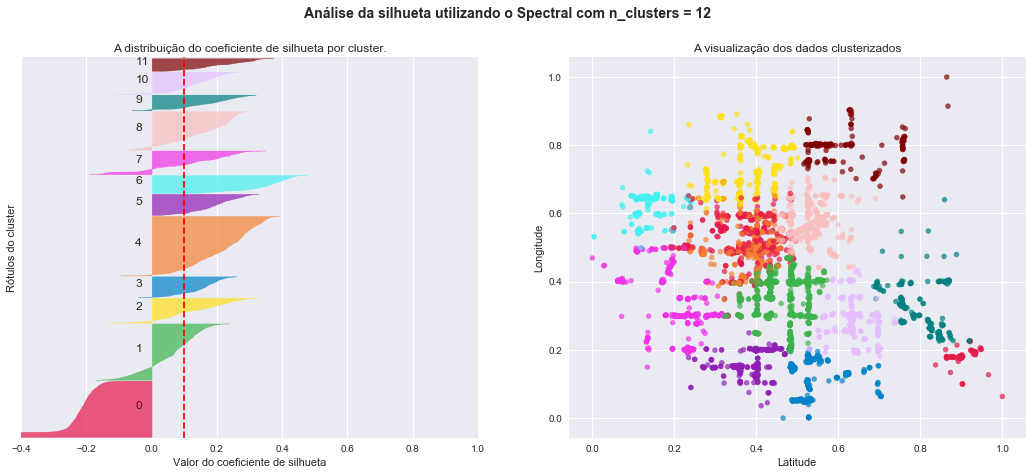

In [77]:
silhouette_analysis(data_spectral, 12,"Spectral")

Para n_clusters =  13 , o silhouette_score médio é: 0.10824547450669326


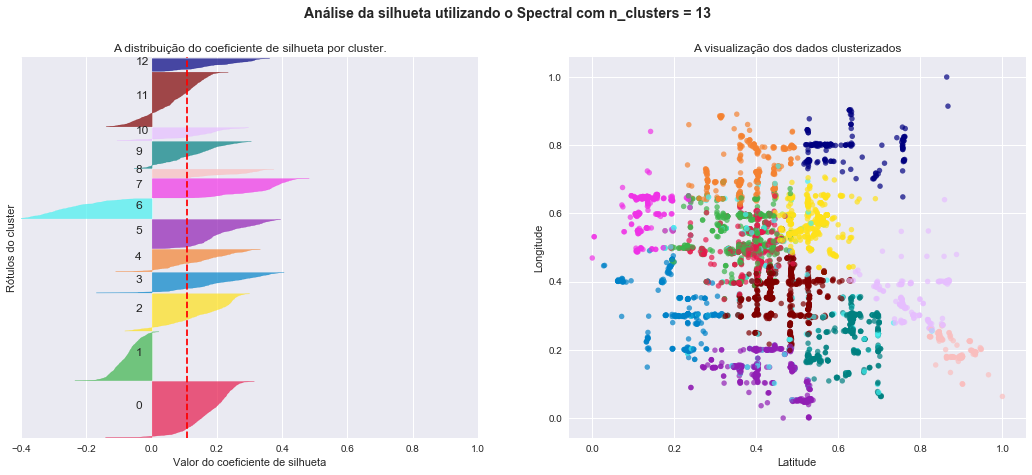

In [78]:
silhouette_analysis(data_spectral, 13,"Spectral")

Para n_clusters =  14 , o silhouette_score médio é: 0.09732861085976592


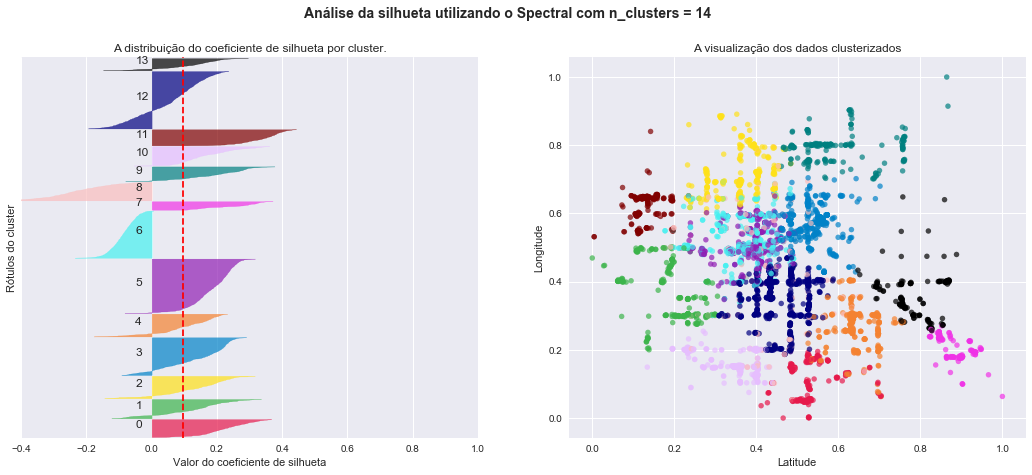

In [79]:
silhouette_analysis(data_spectral, 14,"Spectral")

Para n_clusters =  15 , o silhouette_score médio é: 0.09675971810515369


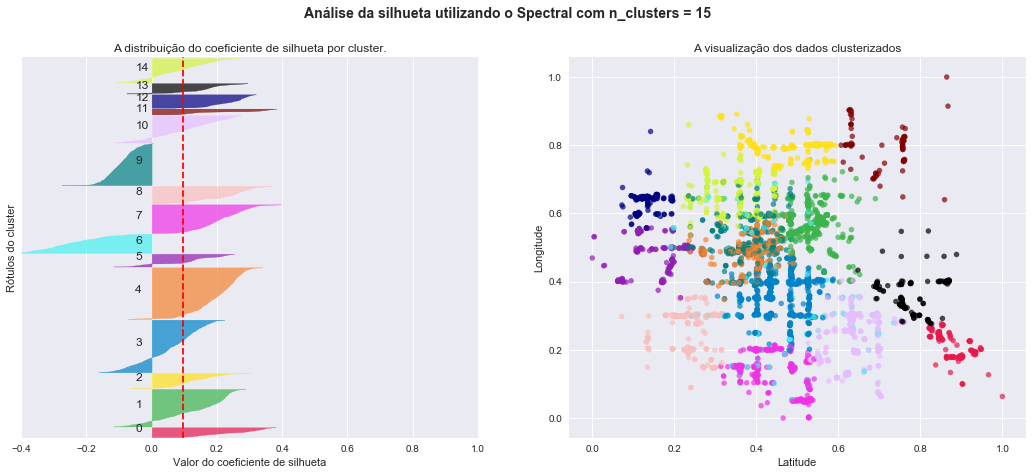

In [80]:
silhouette_analysis(data_spectral, 15,"Spectral")

### Dendograma para o agrupamento hierárquico

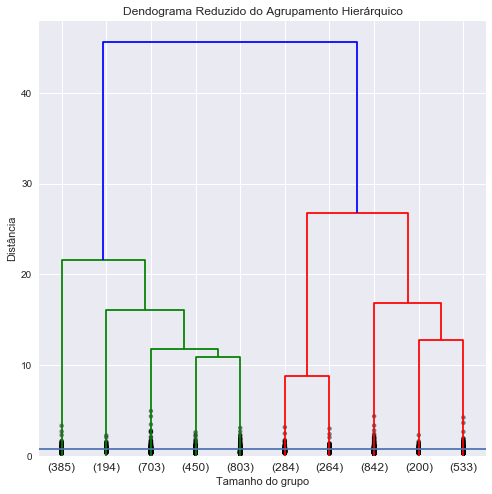

In [84]:
plot_dendrogram(data_hierarchical,10)

In [93]:
categories_kmeans, data_kmeans_labels = create_cluster_labels(data_kmeans, 10, "k-means")

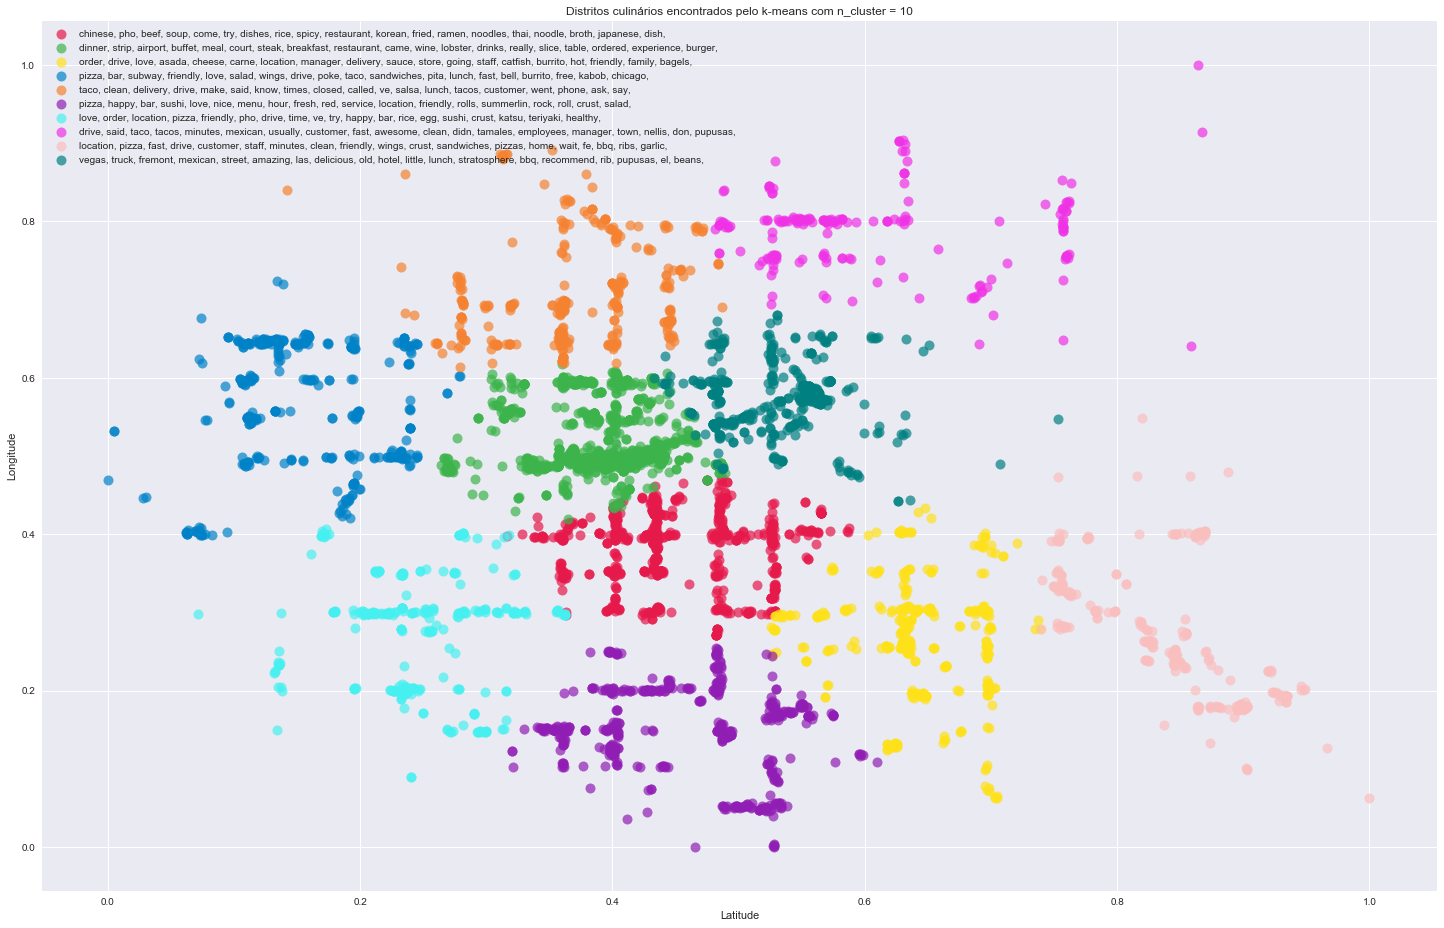

In [96]:
clusterization_plot(categories_kmeans, data_kmeans_labels, "k-means")

In [ ]:
categories_hierarchical, data_hierarchical_labels = create_cluster_labels(data_hierarchical, 10, "hierarchical")

In [ ]:
clusterization_plot(categories_hierarchical, data_hierarchical_labels, "hierarchical")